<a href="https://colab.research.google.com/github/ericksalignac/spotify-dataset-for-eda/blob/main/Spotify_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Preparando o ambiente

In [ ]:
# importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

# melhorar a visualização
%matplotlib inline
mpl.style.use('ggplot')
plt.style.use('fivethirtyeight')
sns.set(context='notebook', palette='dark', color_codes=True)

### Preparando os dados

In [ ]:
# carregando dataset
df = pd.read_csv('https://raw.githubusercontent.com/ericksalignac/spotify-dataset-for-eda/main/dataset.csv', index_col=0)

####Column Description

- track_id: The Spotify ID for the track
- artists: The artists' names who performed the track. If there is more than one artist, they are separated by a ;
- album_name: The album name in which the track appears
- track_name: Name of the track
- popularity: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
- duration_ms: The track length in milliseconds
- explicit: Whether or not the track has explicit lyrics (true = yes it does; - false = no it does not OR unknown)
- danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale
- key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
- loudness: The overall loudness of a track in decibels (dB)
- mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
- speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
- acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
- liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
- valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
- tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
- time_signature: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
- track_genre: The genre in which the track belongs

#### Encontrando dados faltantes

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [ ]:
print(df.isna().sum())

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


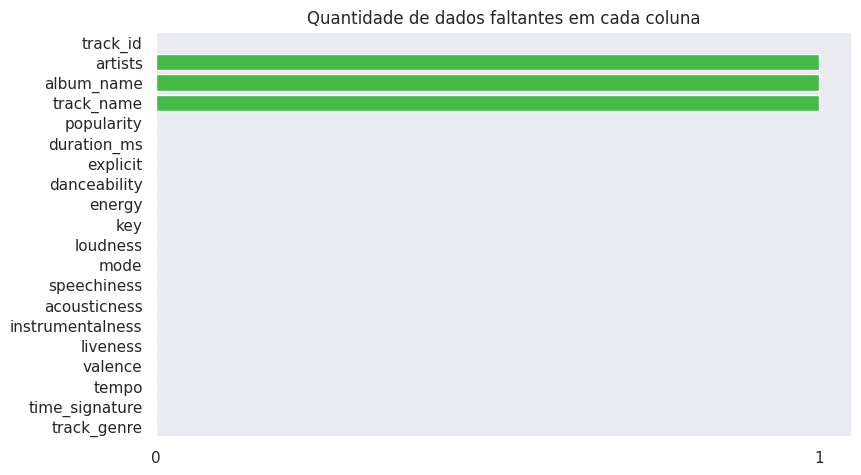

In [ ]:
plt.figure(figsize=(8,5))
data = pd.DataFrame(data = df.isna().sum()).transpose()
sns.barplot(data, orient='h',color='limegreen').set_title('Quantidade de dados faltantes em cada coluna')
plt.xticks(ticks=[0,1])
plt.grid(visible=False)

In [ ]:
df[df['artists'].isna()]

track_id artists album_name track_name  popularity  \
65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN           0   

       duration_ms  explicit  danceability  energy  key  loudness  mode  \
65900            0     False         0.501   0.583    7     -9.46     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
65900       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature track_genre  
65900  138.391               4       k-pop

In [ ]:
# removendo registro com dados faltantes
df = df.dropna()

#### Criando uma nova coluna "is_feature"

In [ ]:
df["artists"] = df.artists.astype(str)
df['is_feature'] = df['artists'].str.contains(';')
pd.set_option('display.max_columns', df.shape[1])
df

track_id                 artists  \
0       5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1       4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2       1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3       6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4       5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...                        ...                     ...   
113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1              0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2              0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3              0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4              0.618  0.4430    2    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350    5   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170    0   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290    0   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060    7   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870    1   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.976000    0.1050   0.0350   85.239               4   
113997          0.000000    0.0839   0.7430  132.378               4   
113998          0.000000    0.2700

## Análise exploratória

### Tópicos de interesse:
- Quais os artistas mais populares
- Quais são as 100 músicas mais populares
- Quais são os gêneros mais populares
- Quais artistas compuseram mais músicas dentro dos 100 mais populares
- Quantas delas foram feitas sozinhas e quantas são ft (feature)

### Dataset sem repetições ordenado pela popularidade

In [ ]:
# O dataset contém registros da mesma música variando apenas o gênero e a popularidade
ranked_data = df.sort_values('popularity', ascending=False)
ranked_data[(ranked_data['track_name'] == 'Efecto') & (ranked_data['artists'] == 'Bad Bunny')]

track_id    artists        album_name track_name  \
68359  5Eax0qFko2dh7Rl2lYs3bx  Bad Bunny  Un Verano Sin Ti     Efecto   
67559  5Eax0qFko2dh7Rl2lYs3bx  Bad Bunny  Un Verano Sin Ti     Efecto   
88451  5Eax0qFko2dh7Rl2lYs3bx  Bad Bunny  Un Verano Sin Ti     Efecto   
89451  5Eax0qFko2dh7Rl2lYs3bx  Bad Bunny  Un Verano Sin Ti     Efecto   

       popularity  duration_ms  explicit  danceability  energy  key  loudness  \
68359          96       213061     False         0.801   0.475    7    -8.797   
67559          96       213061     False         0.801   0.475    7    -8.797   
88451          95       213061     False         0.801   0.475    7    -8.797   
89451          95       213061     False         0.801   0.475    7    -8.797   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
68359     0       0.0516         0.141          0.000017    0.0639    0.234   
67559     0       0.0516         0.141          0.000017    0.0639    0.234   
88451     0       0.0516         0.141          0.000017    0.0639    0.234   
89451     0       0.0516         0.141          0.000017    0.0639    0.234   

        tempo  time_signature track_genre  is_feature  
68359  98.047               4      latino       False  
67559  98.047               4       latin       False  
88451  98.047               4      reggae       False  
89451  98.047               4   reggaeton       False

In [ ]:
ranked_distinct_songs = df[['artists', 'track_name', 'popularity', 'duration_ms', 'is_feature']]
ranked_distinct_songs = ranked_distinct_songs.drop_duplicates(subset=['artists', 'track_name','duration_ms'])
ranked_distinct_songs = ranked_distinct_songs.sort_values('popularity', ascending=False)
ranked_distinct_songs.drop('duration_ms', axis=1, inplace=True)
ranked_distinct_songs = ranked_distinct_songs.reset_index(drop='index')
ranked_distinct_songs['artist_song'] = ranked_distinct_songs['track_name'] + ' - ' + ranked_distinct_songs['artists']
ranked_distinct_songs.shape

(83074, 5)

In [ ]:
ranked_distinct_songs.head(30)

artists                               track_name  \
0          Sam Smith;Kim Petras                Unholy (feat. Kim Petras)   
1              Bizarrap;Quevedo    Quevedo: Bzrp Music Sessions, Vol. 52   
2                 Manuel Turizo                               La Bachata   
3       David Guetta;Bebe Rexha                          I'm Good (Blue)   
4    Bad Bunny;Chencho Corleone                          Me Porto Bonito   
5                     Bad Bunny                         Tití Me Preguntó   
6                     Bad Bunny                                   Efecto   
7                   OneRepublic                          I Ain't Worried   
8                   Chris Brown                      Under The Influence   
9                  Harry Styles                                As It Was   
10      Bad Bunny;Bomba Estéreo                            Ojitos Lindos   
11                         Joji                            Glimpse of Us   
12                    Bad Bunny                              Moscow Mule   
13                    Bad Bunny                                 Neverita   
14                    Tom Odell                             Another Love   
15            The Neighbourhood                          Sweater Weather   
16                      Beyoncé                                  CUFF IT   
17               Arctic Monkeys                         I Wanna Be Yours   
18            Rema;Selena Gomez            Calm Down (with Selena Gomez)   
19   Charlie Puth;Jung Kook;BTS  Left and Right (Feat. Jung Kook of BTS)   
20                  Nicki Minaj                        Super Freaky Girl   
21              Drake;21 Savage            Jimmy Cooks (feat. 21 Savage)   
22                   The Weeknd                          Blinding Lights   
23  Rauw Alejandro;Lyanno;Brray                                   LOKERA   
24             Bad Bunny;Jhayco                                    Tarot   
25                    Luar La L                                    Caile   
26   James Hype;Miggy Dela Rosa                                  Ferrari   
27                      Ruth B.                               Dandelions   
28                    Kate Bush   Running Up That Hill (A Deal With God)   
29                      Seafret                                 Atlantis   

    popularity  is_feature                                        artist_song  
0          100        True   Unholy (feat. Kim Petras) - Sam Smith;Kim Petras  
1           99        True  Quevedo: Bzrp Music Sessions, Vol. 52 - Bizarr...  
2           98       False                         La Bachata - Manuel Turizo  
3           98        True          I'm Good (Blue) - David Guetta;Bebe Rexha  
4           97        True       Me Porto Bonito - Bad Bunny;Chencho Corleone  
5           97       False                       Tití Me Preguntó - Bad Bunny  
6           96       False                                 Efecto - Bad Bunny  
7           96       False                      I Ain't Worried - OneRepublic  
8           96       False                  Under The Influence - Chris Brown  
9           95       False                           As It Was - Harry Styles  
10          95        True            Ojitos Lindos - Bad Bunny;Bomba Estéreo  
11          94       False                               Glimpse of Us - Joji  
12          94       False                            Moscow Mule - Bad Bunny  
13          93       False                               Neverita - Bad Bunny  
14          93       False                           Another Love - Tom Odell  
15          93       False                Sweater Weather - The Neighbourhood  
16          93       False                                  CUFF IT - Beyoncé  
17          92       False                  I Wanna Be Yours - Arctic Monkeys  
18          92        True  Calm Down (with Selena Gomez) - Rema;Selena Gomez  
19          92        True  Left and Right (Feat. Jung Kook of BTS)

### Quais os 10 artistas mais populares?

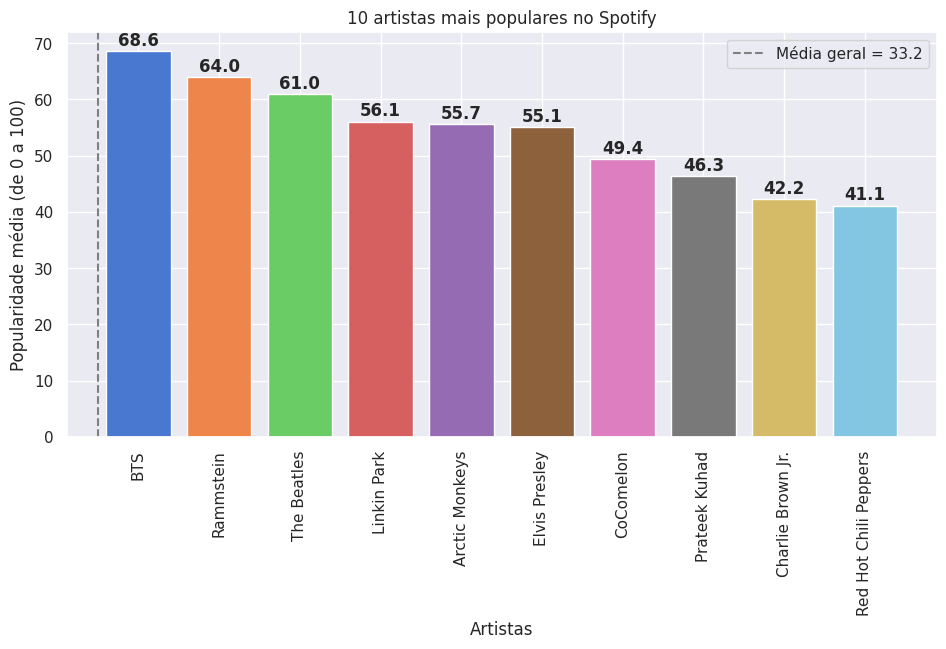

In [ ]:
# Agrupar as músicas por artista e somar a pontuação de popularidade de cada uma
artist_popularity = df.groupby('artists')['popularity'].sum()

# Ordenar os resultados em ordem decrescente e selecionar os 10 primeiros
top_10_artists = artist_popularity.sort_values(ascending=False).head(10)

# Selecionar as músicas dos 10 artistas mais populares
top_10 = df[df['artists'].isin(top_10_artists.index)]

# Calcular a popularidade média por artista
grouped = top_10.groupby('artists')['popularity'].mean().reset_index().sort_values(by='popularity', ascending=False)

# Definir a paleta de cores para o gráfico de barras
colors = sns.color_palette('muted', n_colors=10)

# Criar o gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(grouped['artists'], grouped['popularity'], color=colors)
plt.xticks(rotation=90)
plt.xlabel('Artistas')
plt.ylabel('Popularidade média (de 0 a 100)')
plt.title('10 artistas mais populares no Spotify')

# Adicionar rótulos às barras com o valor da popularidade média
for i, v in enumerate(grouped['popularity']):
    plt.text(i, v+1, str(round(v, 1)), horizontalalignment='center', fontweight='bold')

# Adicionar linha vertical no gráfico para indicar a média geral da popularidade das músicas
mean_popularity = df['popularity'].mean()
plt.axvline(x=-0.5, color='gray', linestyle='--', label=f'Média geral = {round(mean_popularity, 1)}')
plt.legend()
plt.show()

### Quais são os gêneros mais populares?


   track_genre  popularity
81    pop-film   59.283000
65       k-pop   56.952953
15       chill   53.651000
94         sad   52.379000
44      grunge   49.594000
55      indian   49.539000
5        anime   48.772000
33         emo   48.128000
97   sertanejo   47.866000
80         pop   47.576000


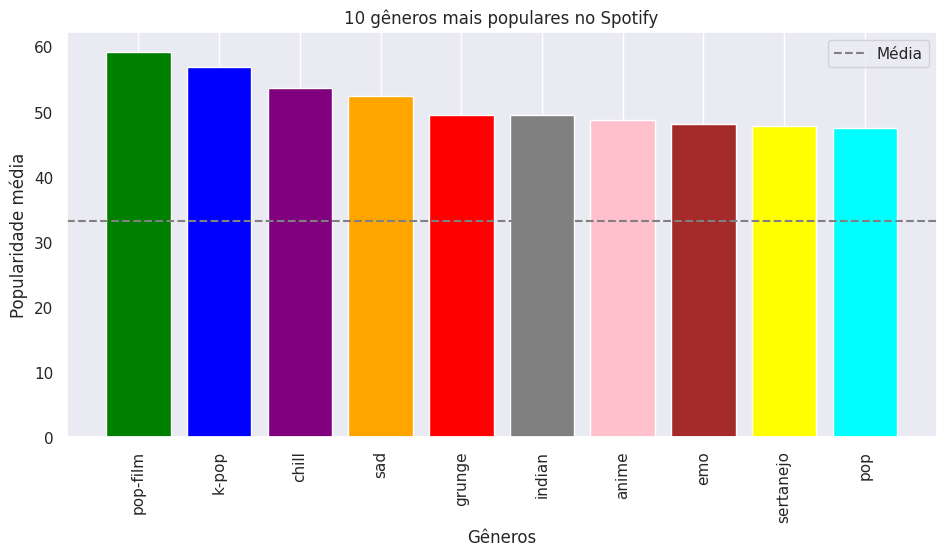

In [ ]:
# Agrupar as músicas por gênero e calcular a média da popularidade de cada gênero
grouped = df.groupby('track_genre')['popularity'].mean().reset_index()

# Selecionar os 10 gêneros mais populares
top_10 = grouped.sort_values(by='popularity', ascending=False).head(10)

print(top_10)

# Criar o gráfico de barras
colors = ['green', 'blue', 'purple', 'orange', 'red', 'gray', 'pink', 'brown', 'yellow', 'cyan']
mean_popularity = df['popularity'].mean()
plt.figure(figsize=(10, 5))
plt.bar(top_10['track_genre'], top_10['popularity'], color=colors)
plt.axhline(y=mean_popularity, color='gray', linestyle='--', label='Média')
plt.xticks(rotation=90)
plt.xlabel('Gêneros')
plt.ylabel('Popularidade média')
plt.title('10 gêneros mais populares no Spotify')
plt.grid(axis='y')
plt.legend()
plt.show()

### Quantas das musicas mais populares são ft (features) e quantas foram feitas sozinhas

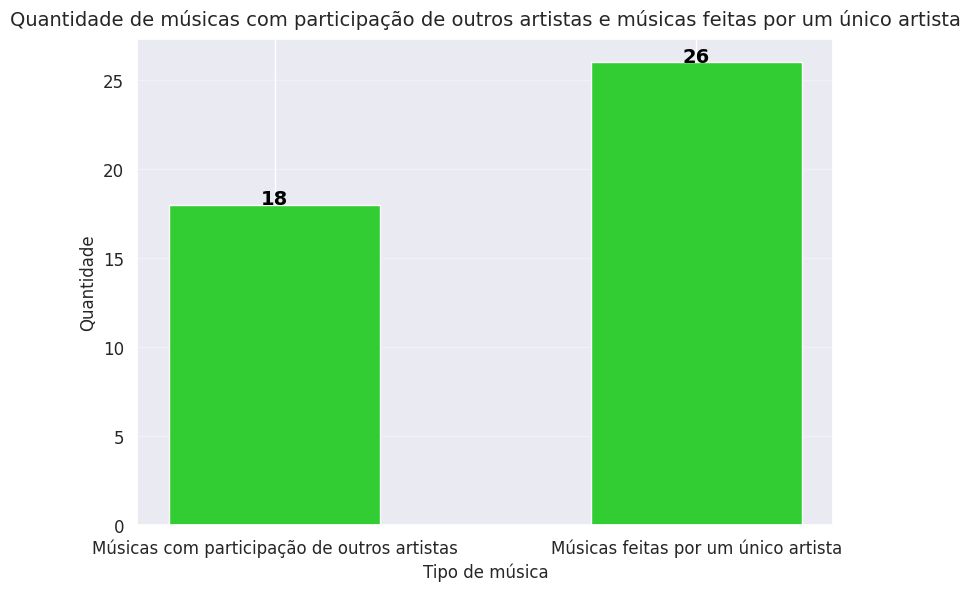

In [ ]:
# Selecionar as 100 músicas mais populares
top_100 = df.nlargest(100, 'popularity')

# Criar nova coluna indicando se há participação de outros artistas
top_100['featuring'] = top_100['artists'].apply(lambda x: ';' in x.lower())

# Separar músicas com participação de outros artistas das músicas feitas por um único artista
ft_music = top_100[top_100['featuring'] == True].drop_duplicates(subset=['track_name', 'artists'])
no_ft_music = top_100[top_100['featuring'] == False].drop_duplicates(subset=['track_name', 'artists'])

# # Imprimir as músicas e os artistas em uma tabela estilizada
# print("Músicas com participação de outros artistas:\n")
# print(ft_music[['track_name', 'artists']].to_string(index=False, justify='left').replace(';', ' ft '))
# print("\nMúsicas feitas por um único artista:\n")
# print(no_ft_music[['track_name', 'artists']].to_string(index=False, justify='left'))
 
# Contar a quantidade de músicas com participação de outros artistas e a quantidade de músicas feitas por um único artista
ft_count = len(ft_music)
no_ft_count = len(no_ft_music)

# Criar o gráfico
plt.figure(figsize=(8,6))
plt.bar(['Músicas com participação de outros artistas', 'Músicas feitas por um único artista'], [ft_count, no_ft_count], width=0.5, color='limegreen')
plt.title('Quantidade de músicas com participação de outros artistas e músicas feitas por um único artista', fontsize=14, pad=10)
plt.xlabel('Tipo de música', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3, axis='y')
for i, v in enumerate([ft_count, no_ft_count]):
    plt.text(i, v, str(v), color='black', ha='center', fontweight='bold', fontsize=14)
plt.show()



### Popularidade (composições solo e feat)

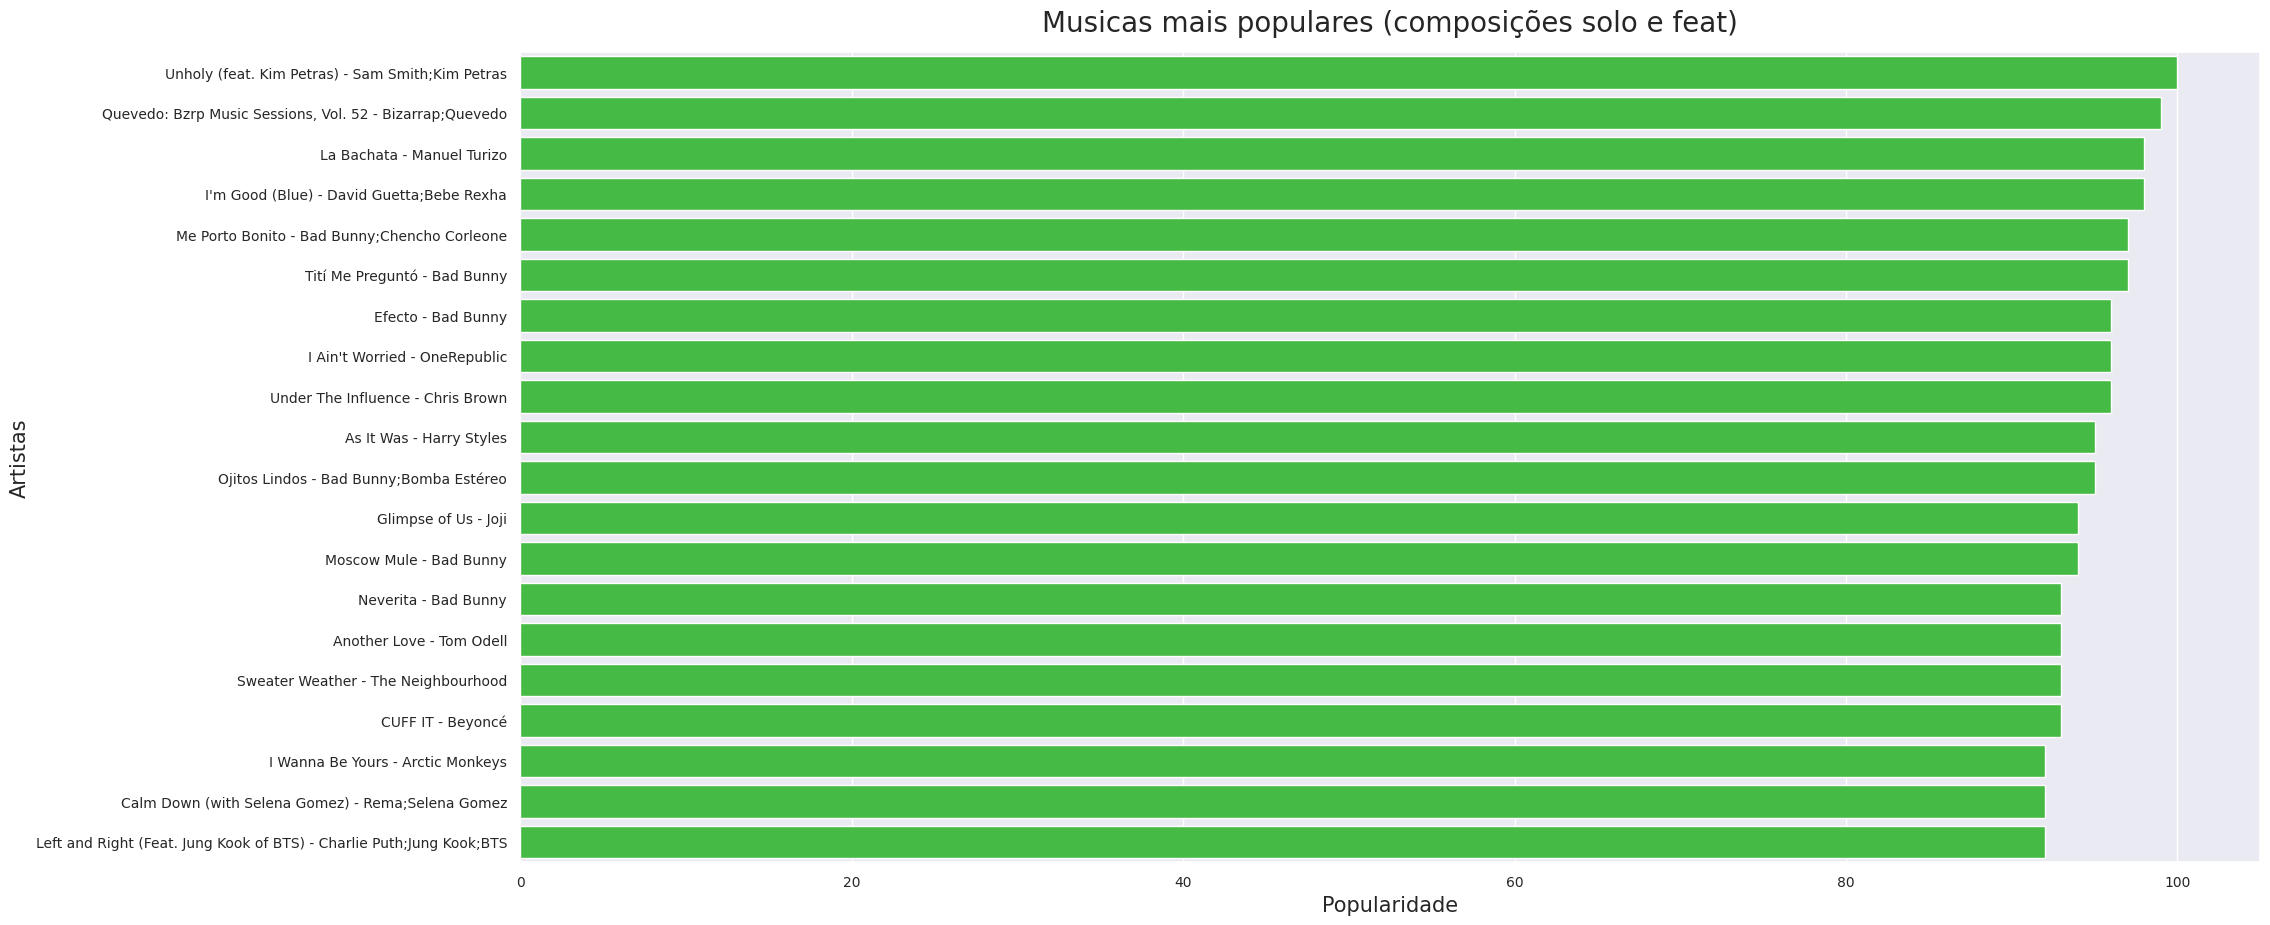

In [ ]:
plt.figure(figsize=(20,10))
bar = sns.barplot(data=ranked_distinct_songs.head(20),y='artist_song', x='popularity', color='limegreen').set_title('Musicas mais populares (composições solo e feat)', fontsize=20, pad=15)
bar.axes.set_ylabel('Artistas',fontsize=15)
bar.axes.set_xlabel('Popularidade',fontsize=15)
bar.axes.tick_params(axis='both', which='major', labelsize=10)
bar.axes.tick_params(axis='x', which='major', labelsize=10)

In [ ]:
# Quais os artistas que aparecem mais vezes nas músicas mais populares?

artists = []
for i in range(0,100):
  lista = ranked_distinct_songs.head(100)['artists'].values[i].split(';')
  for artist in range(0,len(lista)):
    artists.append(lista[artist])

# Frequência dos artistas nos top 100
top_100_count = pd.Series(artists).value_counts()
top_100_count = pd.DataFrame(top_100_count, columns=['frequency'])
top_100_count.reset_index(names='artists', inplace=True)
top_100_count.head(30)

artists  frequency
0           Bad Bunny         14
1          The Weeknd          7
2      Olivia Rodrigo          4
3      Arctic Monkeys          4
4      Rauw Alejandro          3
5          Ed Sheeran          3
6           Sam Smith          2
7              Eminem          2
8           Lil Nas X          2
9               Drake          2
10                BTS          2
11  The Neighbourhood          2
12           Doja Cat          2
13      Justin Bieber          2
14               Feid          2
15             Khalid          2
16    Imagine Dragons          2
17   Chencho Corleone          2
18       Harry Styles          2
19        Calum Scott          1
20      One Direction          1
21      The Kid LAROI          1
22        Omar Apollo          1
23   Lost Frequencies          1
24        The Walters          1
25               L.V.          1
26       Taylor Swift          1
27             Coolio          1
28            J. Cole          1
29             Pritam          1

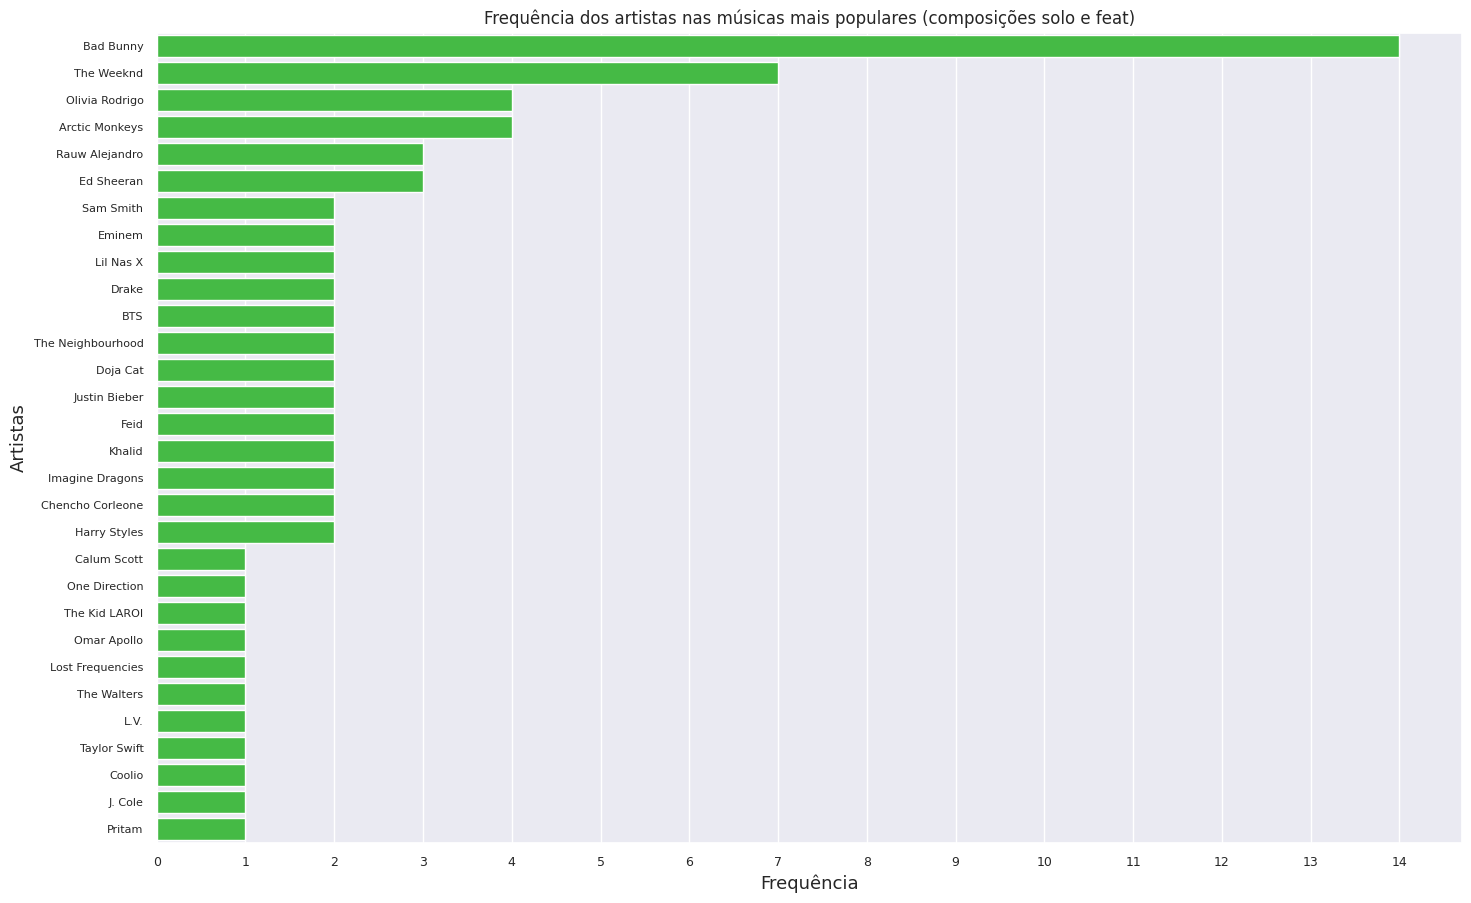

In [ ]:
plt.figure(figsize=(15,10))
bar = sns.barplot(data=top_100_count.head(30), x='frequency', y='artists', orient='h', color='limegreen').set_title('Frequência dos artistas nas músicas mais populares (composições solo e feat)')
plt.xticks(ticks=range(0,15))
bar.axes.set_ylabel('Artistas',fontsize=13)
bar.axes.set_xlabel('Frequência',fontsize=13)
bar.axes.tick_params(axis='both', which='major', labelsize=8)
bar.axes.tick_params(axis='x', which='major', labelsize=9)

###Popularidade (solo)

In [ ]:
musicas_solo = ranked_distinct_songs[ranked_distinct_songs['is_feature'] == False]

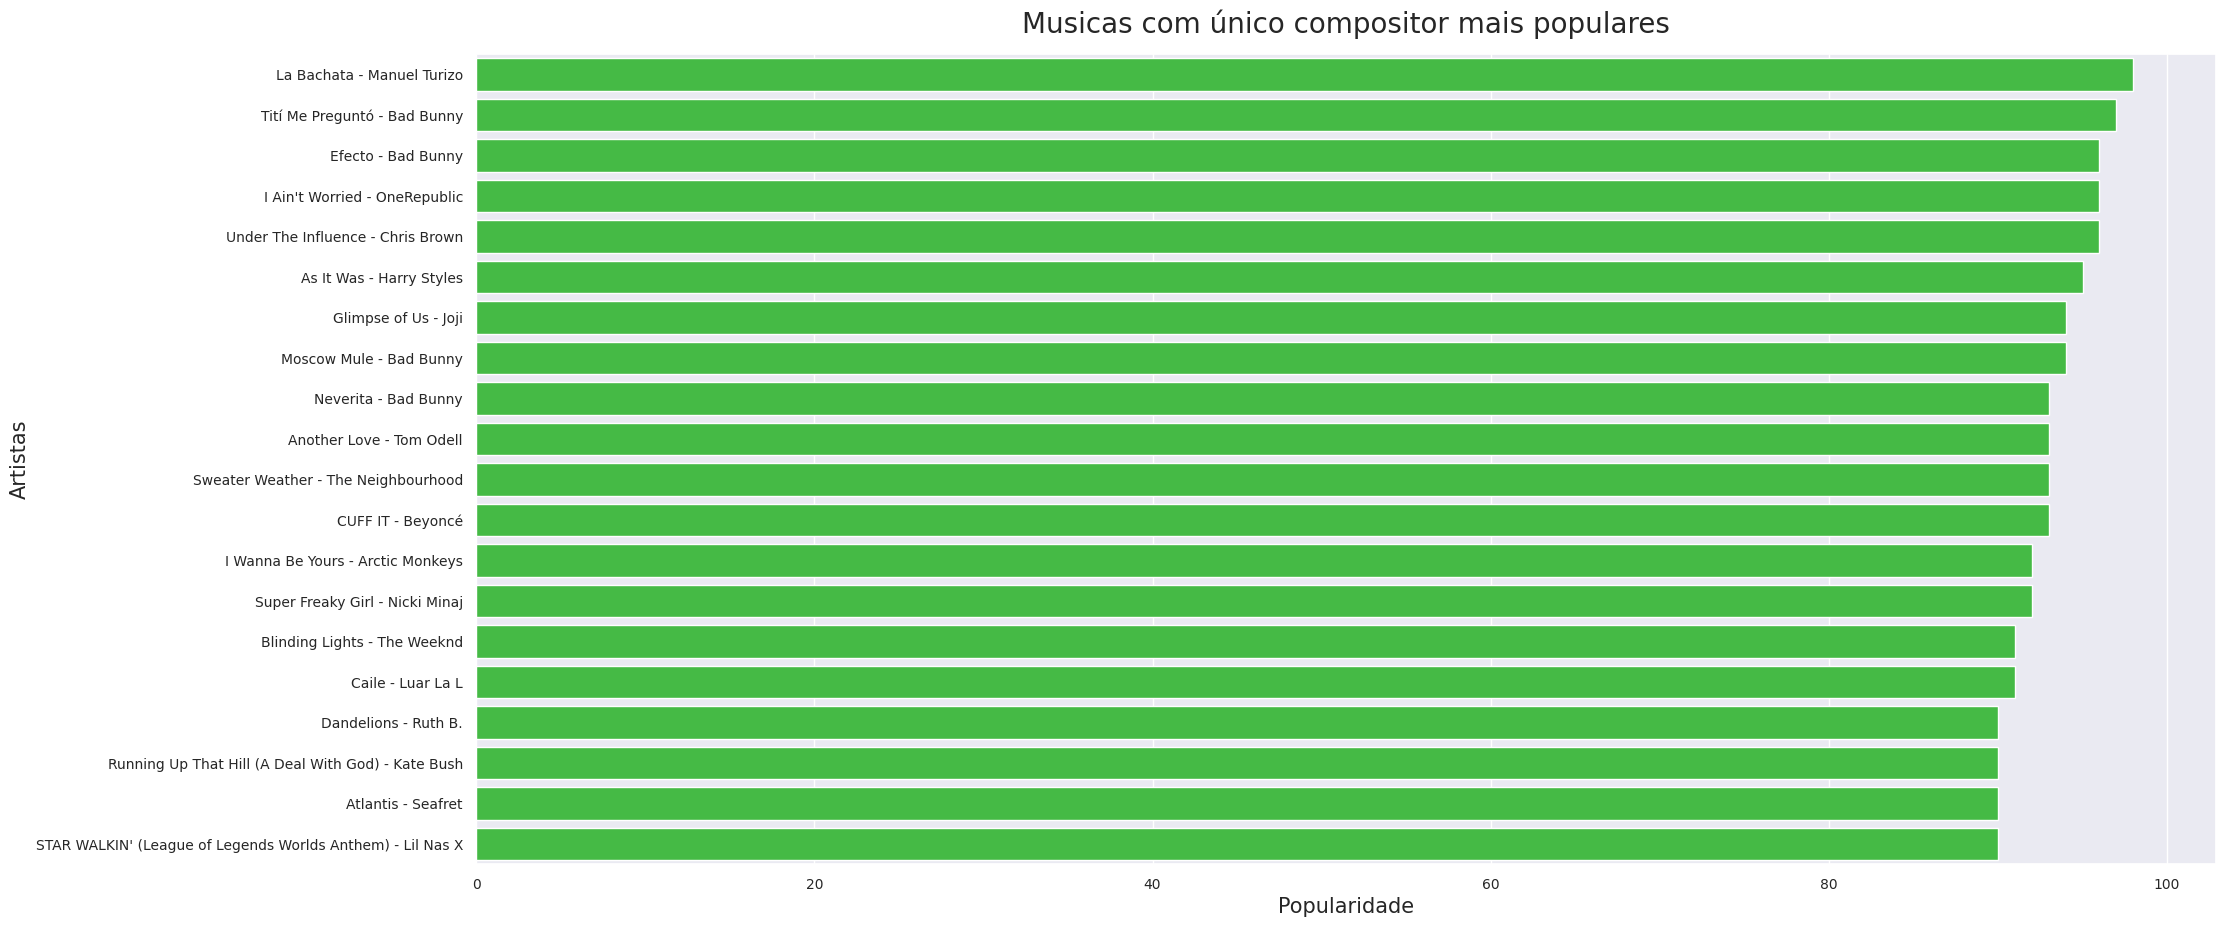

In [ ]:
plt.figure(figsize=(20,10))
bar = sns.barplot(data=musicas_solo.head(20),y='artist_song', x='popularity', color='limegreen').set_title('Musicas com único compositor mais populares', fontsize=20, pad=15)
bar.axes.set_ylabel('Artistas',fontsize=15)
bar.axes.set_xlabel('Popularidade',fontsize=15)
bar.axes.tick_params(axis='both', which='major', labelsize=10)
bar.axes.tick_params(axis='x', which='major', labelsize=10)

In [ ]:
# Quais os artistas que aparecem mais vezes nas músicas mais populares?

artists = []
for i in range(0,100):
  lista = musicas_solo.head(100)['artists'].values[i].split(';')
  for artist in range(0,len(lista)):
    artists.append(lista[artist])

# Frequência dos artistas nos top 100
top_100_solo_count = pd.Series(artists).value_counts()
top_100_solo_count = pd.DataFrame(top_100_solo_count, columns=['frequency'])
top_100_solo_count.reset_index(names='artists', inplace=True)
top_100_solo_count.head()

artists  frequency
0       Bad Bunny          8
1      The Weeknd          5
2  Olivia Rodrigo          5
3  Arctic Monkeys          4
4      Ed Sheeran          4

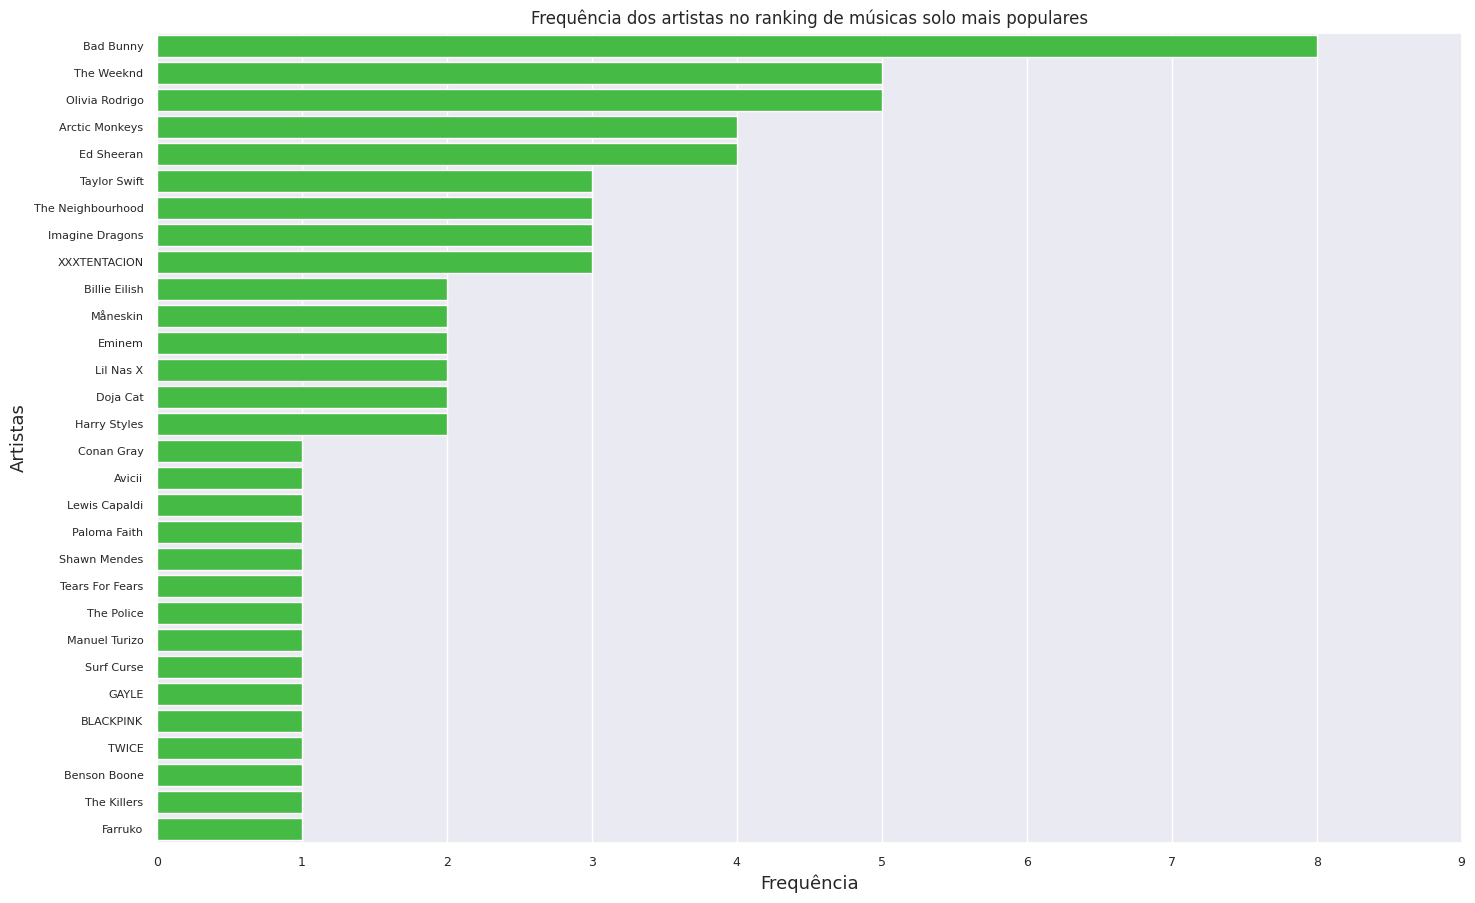

In [ ]:
plt.figure(figsize=(15,10))
bar = sns.barplot(data=top_100_solo_count.head(30), x='frequency', y='artists', orient='h', color='limegreen').set_title('Frequência dos artistas no ranking de músicas solo mais populares')
plt.xticks(ticks=range(0,10))
bar.axes.set_ylabel('Artistas',fontsize=13)
bar.axes.set_xlabel('Frequência',fontsize=13)
bar.axes.tick_params(axis='both', which='major', labelsize=8)
bar.axes.tick_params(axis='x', which='major', labelsize=9)

### Popularidade (feat)

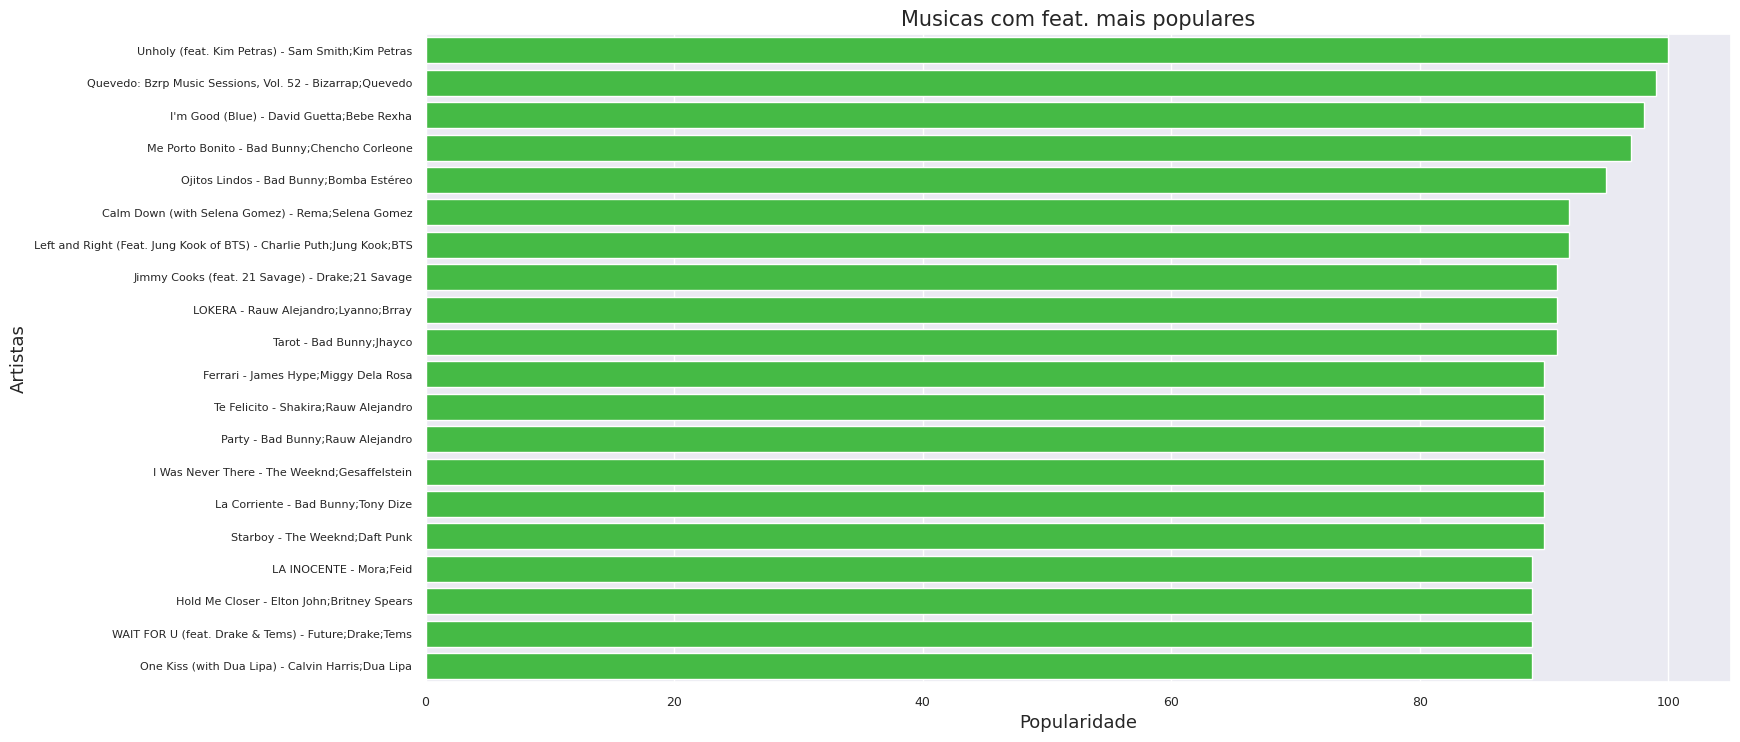

In [ ]:
musicas_com_feat = ranked_distinct_songs[ranked_distinct_songs['is_feature'] == True]

plt.figure(figsize=(15,8))
bar = sns.barplot(data=musicas_com_feat.head(20),y='artist_song', x='popularity', color='limegreen').set_title('Musicas com feat. mais populares', fontsize=15)
bar.axes.set_ylabel('Artistas',fontsize=13)
bar.axes.set_xlabel('Popularidade',fontsize=13)
bar.axes.tick_params(axis='both', which='major', labelsize=8)
bar.axes.tick_params(axis='x', which='major', labelsize=9)

In [ ]:
# Quais os artistas que aparecem mais vezes nas músicas com feat mais populares?

artists = []
for i in range(0,100):
  lista = musicas_com_feat.head(100)['artists'].values[i].split(';')
  for artist in range(0,len(lista)):
    artists.append(lista[artist])

# Frequência dos artistas nos top 100
top_100_feat_count = pd.Series(artists).value_counts()
top_100_feat_count = pd.DataFrame(top_100_feat_count, columns=['frequency'])
top_100_feat_count.reset_index(names='artists', inplace=True)
top_100_feat_count.head()

artists  frequency
0       Bad Bunny         14
1  Rauw Alejandro          5
2          Eminem          5
3      The Weeknd          5
4           Drake          4

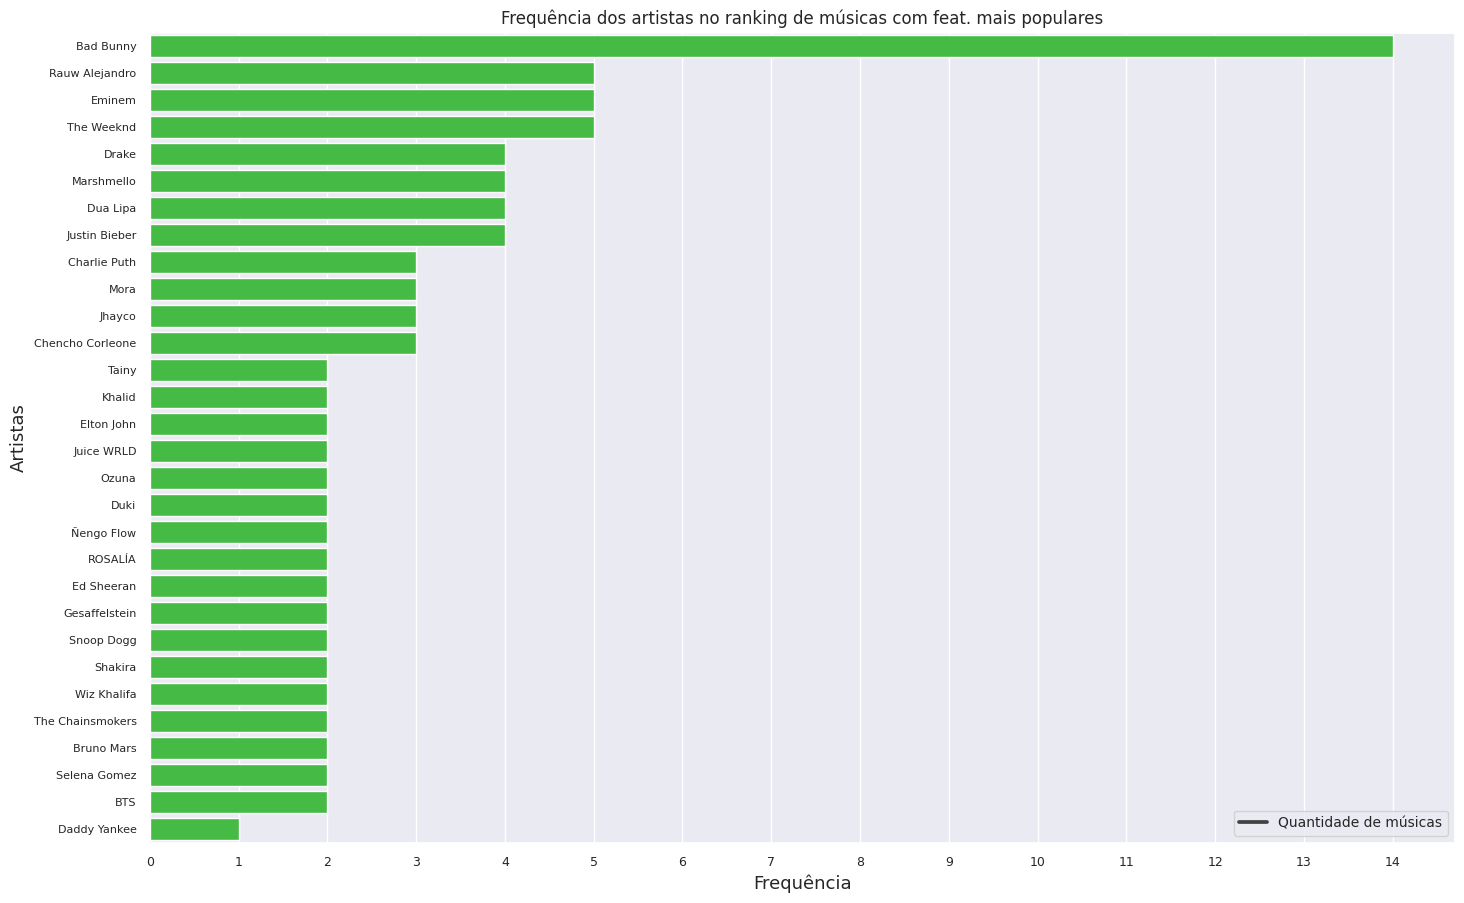

In [ ]:
plt.figure(figsize=(15,10))
bar = sns.barplot(data=top_100_feat_count.head(30), x='frequency', y='artists', orient='h', color='limegreen').set_title('Frequência dos artistas no ranking de músicas com feat. mais populares')
plt.xticks(ticks=range(0,15))
bar.axes.legend(['Quantidade de músicas'], loc='lower right', fontsize=10)
bar.axes.set_ylabel('Artistas',fontsize=13)
bar.axes.set_xlabel('Frequência',fontsize=13)
bar.axes.tick_params(axis='both', which='major', labelsize=8)
bar.axes.tick_params(axis='x', which='major', labelsize=9)

### Gráfico das distribuições

Gêneros mais populares

In [ ]:
top_100 = ranked_data.head(100)
top_100 = pd.DataFrame(top_100.track_genre.value_counts()).reset_index()
top_100.rename(columns={'index': 'track_genre', 'track_genre': 'popularity'}, inplace=True)
top_100.head()

track_genre  popularity
0         pop          19
1   reggaeton          13
2      reggae          13
3      latino          11
4       latin          11

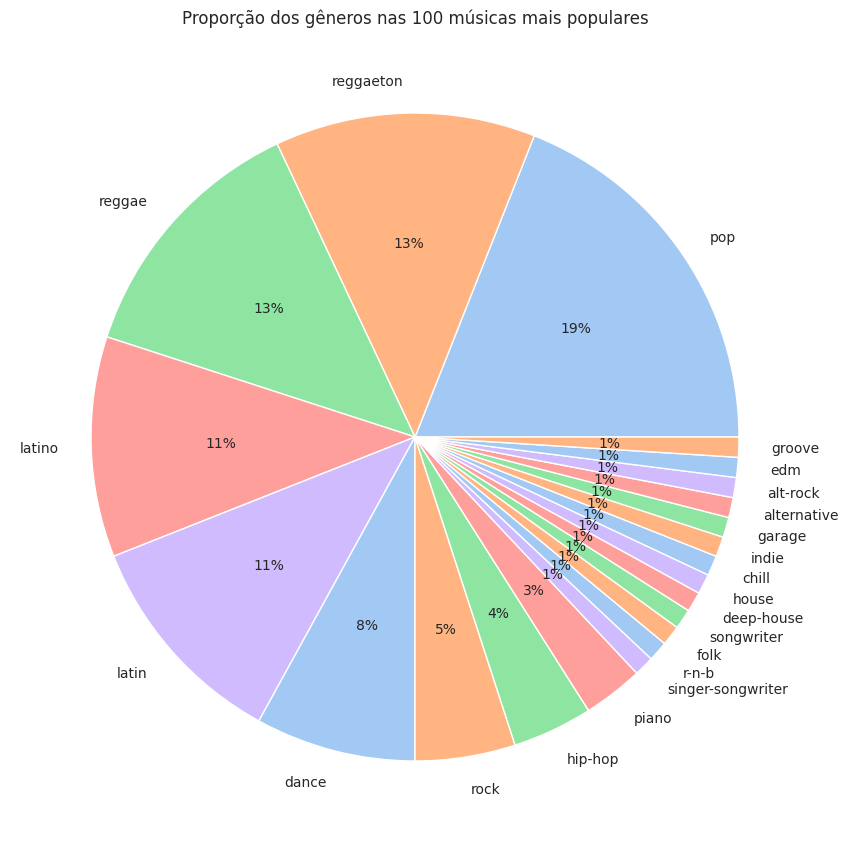

In [ ]:
#define data
top_100 = ranked_data.head(100).track_genre.value_counts()
labels = top_100.index

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(aspect="equal"))
ax.pie(top_100, labels = labels, colors = colors, autopct='%.0f%%', textprops={'fontsize': 10})
ax.set_title('Proporção dos gêneros nas 100 músicas mais populares')
plt.show()


Distribuição dos gêneros nos top 100 populares

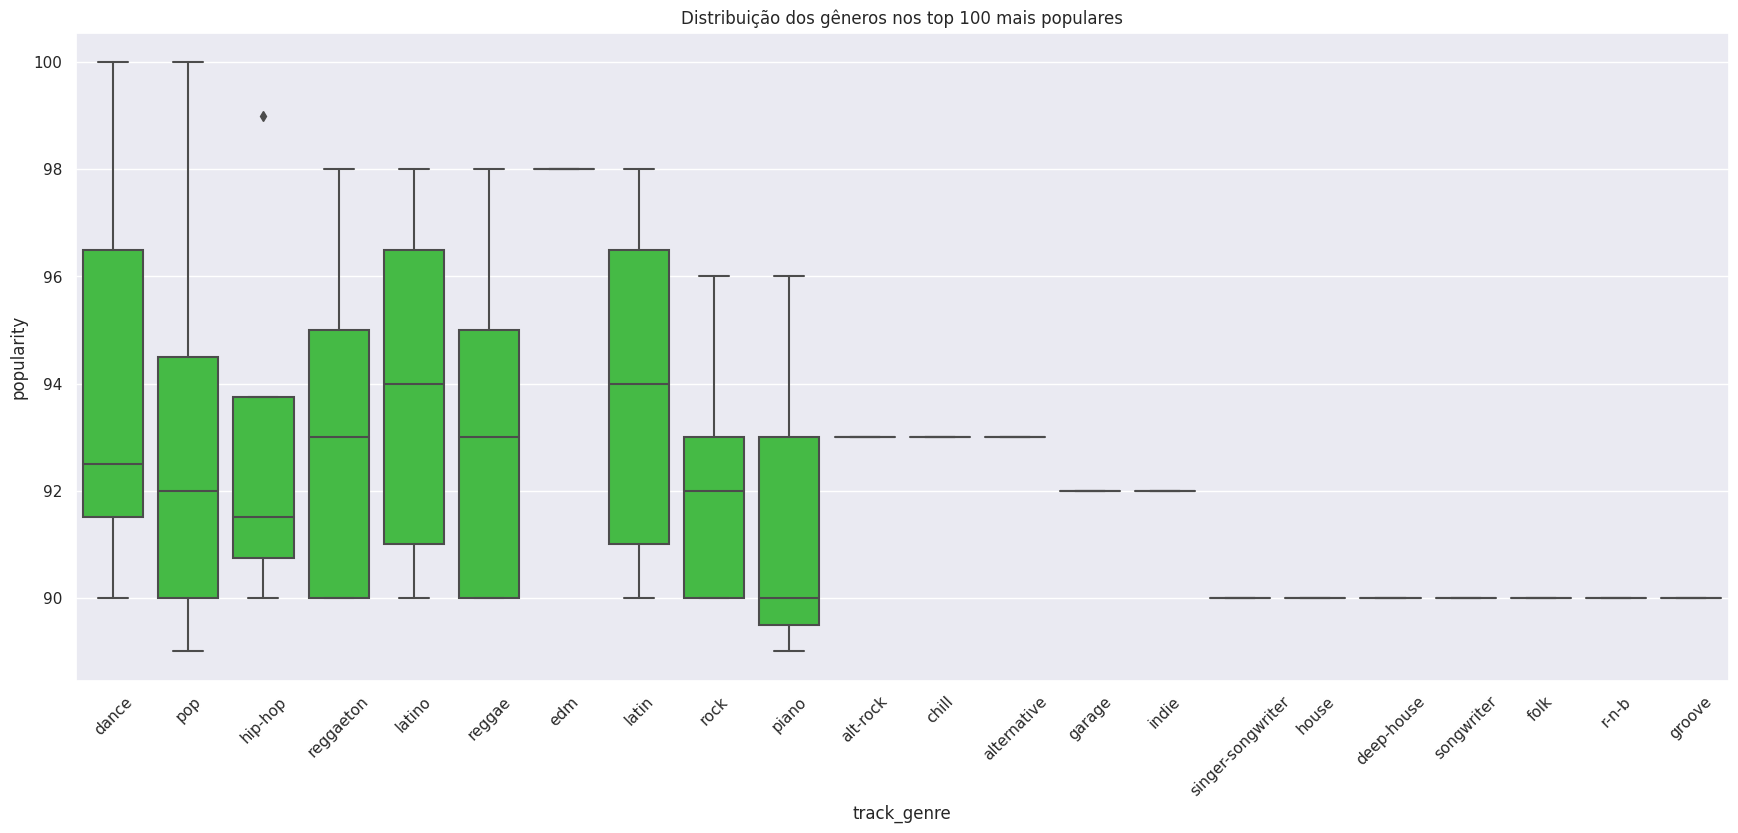

In [ ]:
plt.figure(figsize=(19,8))

boxplot = sns.boxplot(data = ranked_data.head(100), y= 'popularity', x = 'track_genre', color='limegreen').set_title(f"Distribuição dos gêneros nos top 100 mais populares")
plt.xticks(rotation=45)
plt.show()

In [ ]:
distinct_songs = df[['artists', 'track_name','duration_ms',	'danceability',	'energy',	'speechiness', 'acousticness', 'instrumentalness', 'liveness',	'valence', 'track_genre', 'popularity']]
distinct_songs = distinct_songs.drop_duplicates(subset=['artists', 'track_name','duration_ms'])
distinct_songs.describe()

duration_ms  danceability        energy   speechiness  acousticness  \
count  8.307400e+04  83074.000000  83074.000000  83074.000000  83074.000000   
mean   2.312765e+05      0.559441      0.634864      0.088521      0.329985   
std    1.158306e+05      0.177296      0.258436      0.115810      0.339976   
min    8.586000e+03      0.000000      0.000000      0.000000      0.000000   
25%    1.738930e+05      0.447000      0.455000      0.036000      0.016000   
50%    2.152390e+05      0.573000      0.678000      0.049000      0.191000   
75%    2.670698e+05      0.690000      0.856000      0.086500      0.630000   
max    5.237295e+06      0.985000      1.000000      0.965000      0.996000   

       instrumentalness      liveness       valence    popularity  
count      83074.000000  83074.000000  83074.000000  83074.000000  
mean           0.182595      0.219429      0.464983     34.720996  
std            0.330123      0.197750      0.263411     19.526807  
min            0.000000      0.000000      0.000000      0.000000  
25%            0.000000      0.098500      0.243000     21.000000  
50%            0.000083      0.133000      0.451000     35.000000  
75%            0.140000      0.282000      0.678000     49.000000  
max            1.000000      1.000000      0.995000    100.000000

<Figure size 1500x800 with 0 Axes>

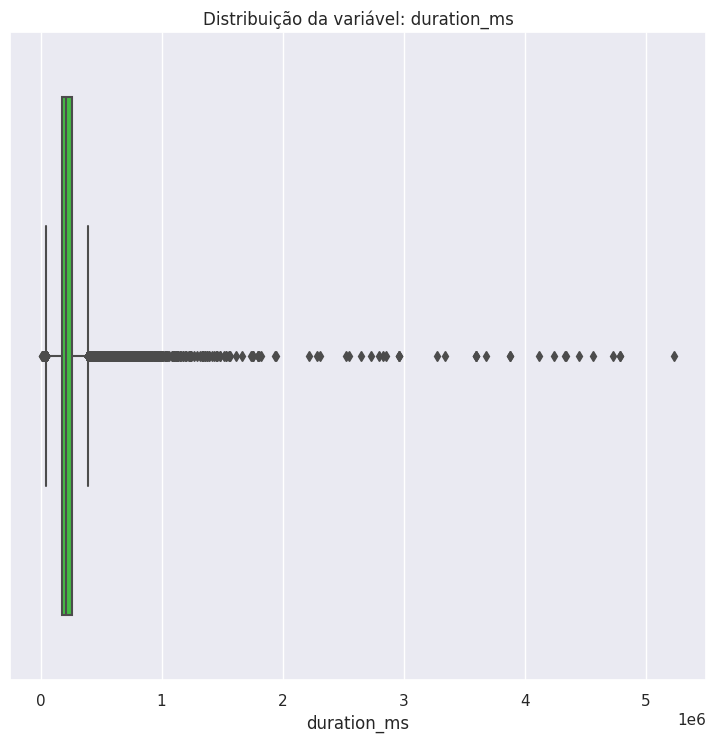

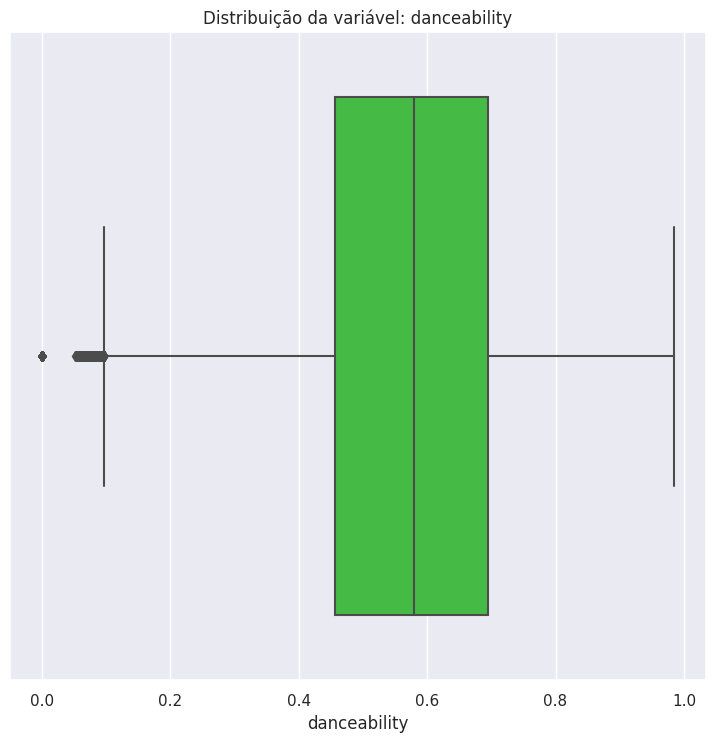

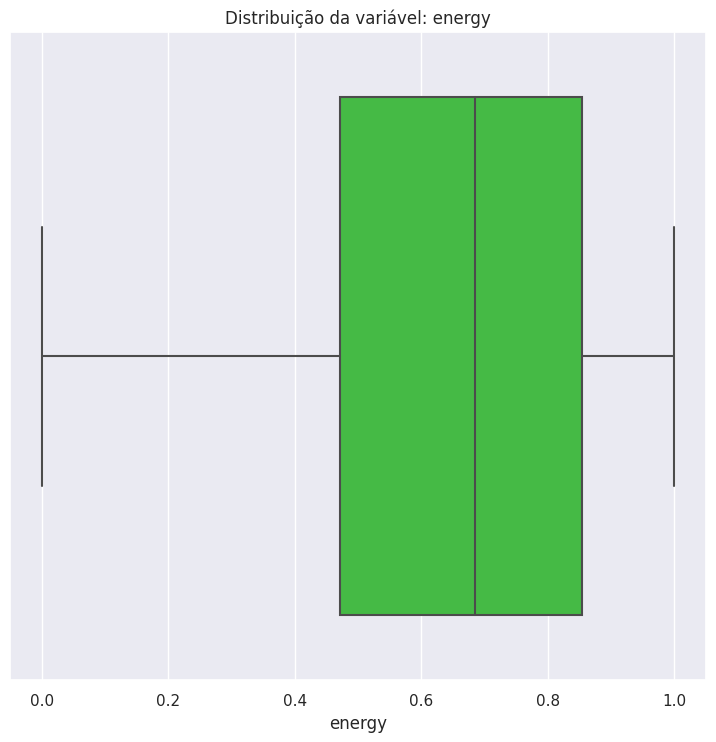

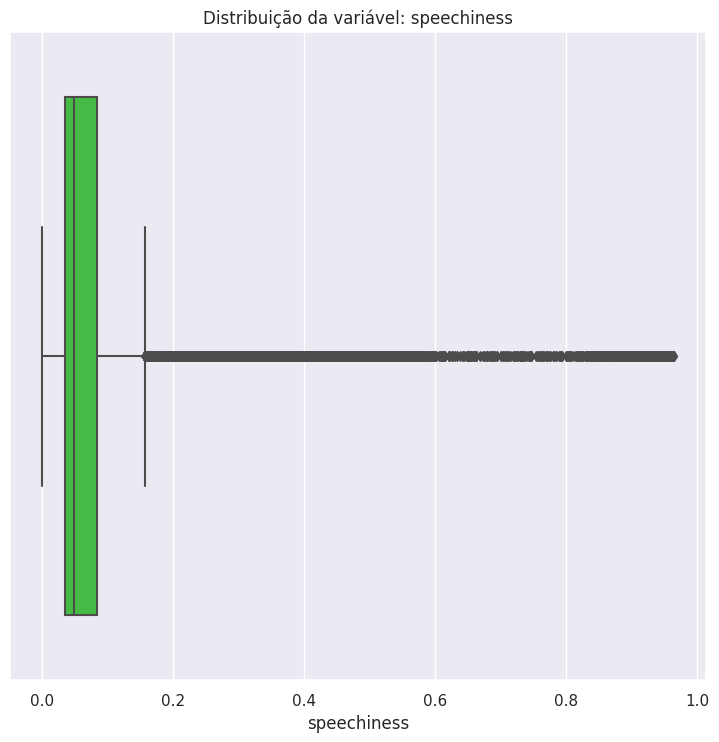

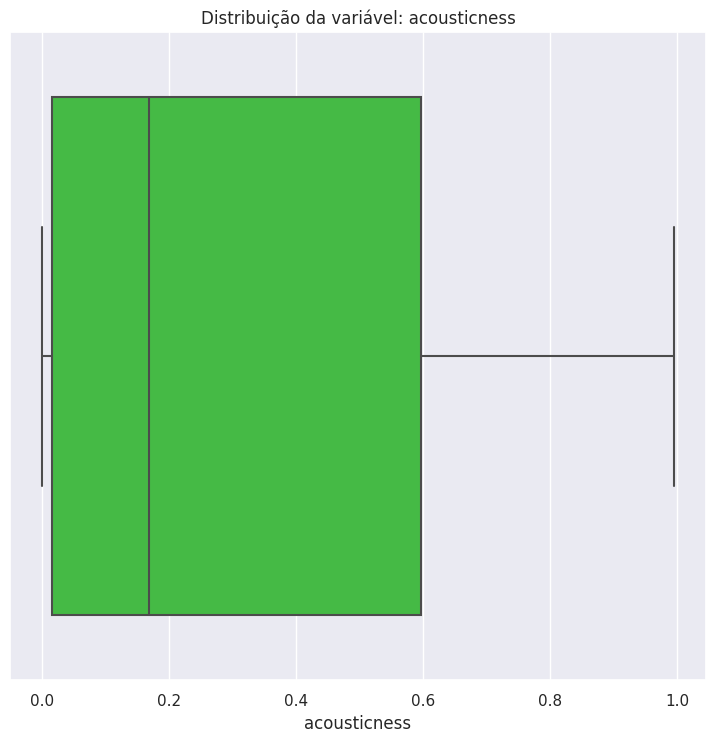

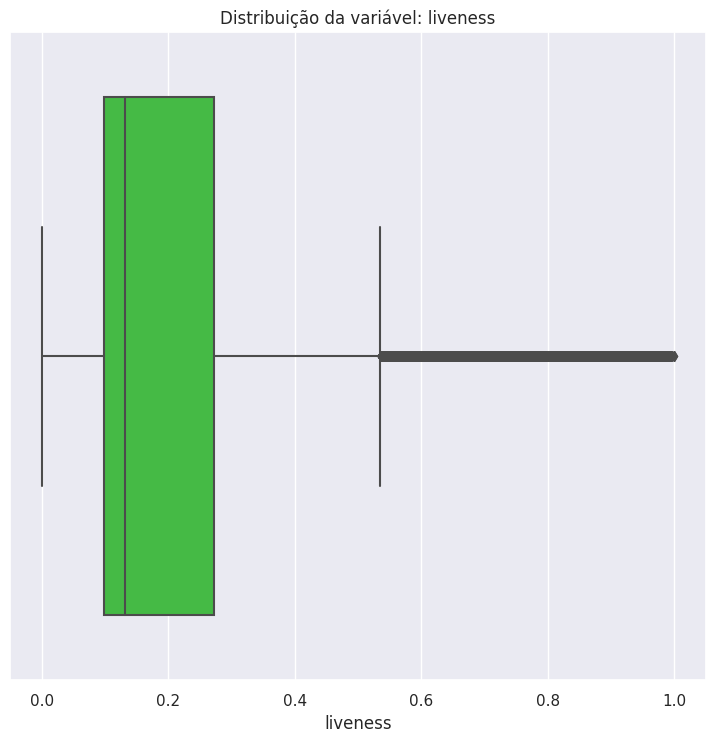

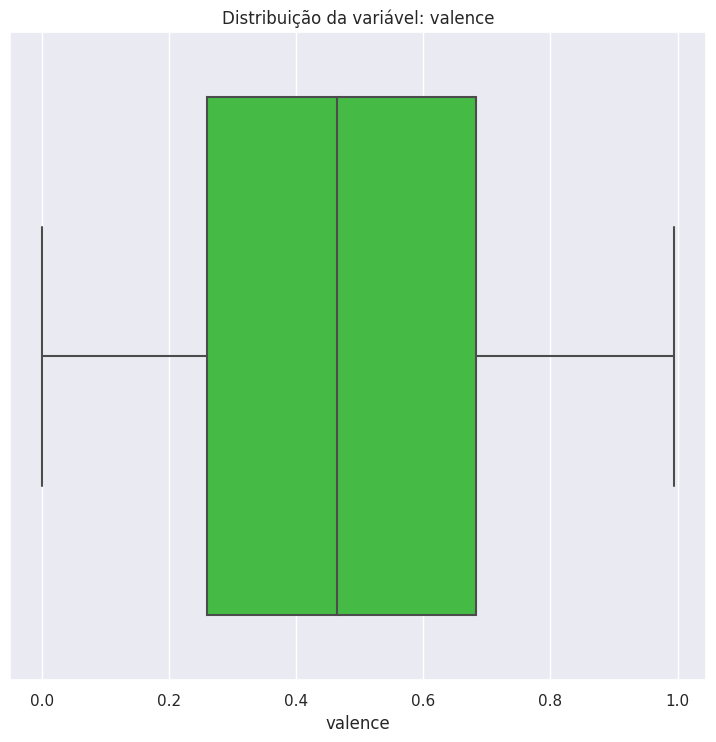

In [ ]:
distinct_songs.head(5)
plt.figure(figsize=(15,8))
features= ['duration_ms',	'danceability',	'energy',	'speechiness', 'acousticness', 'liveness',	'valence']
for feature in features:
    plt.figure(figsize=(8,8))
    sns.boxplot(data = df,
                x = feature,color='limegreen').set_title(f"Distribuição da variável: {feature}")
    plt.show()

<Figure size 1500x800 with 0 Axes>

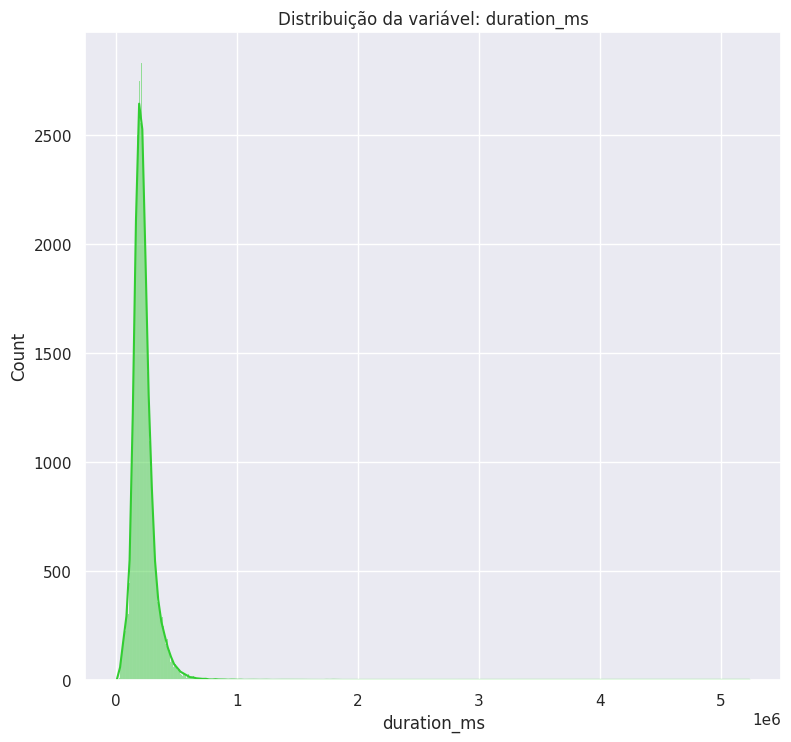

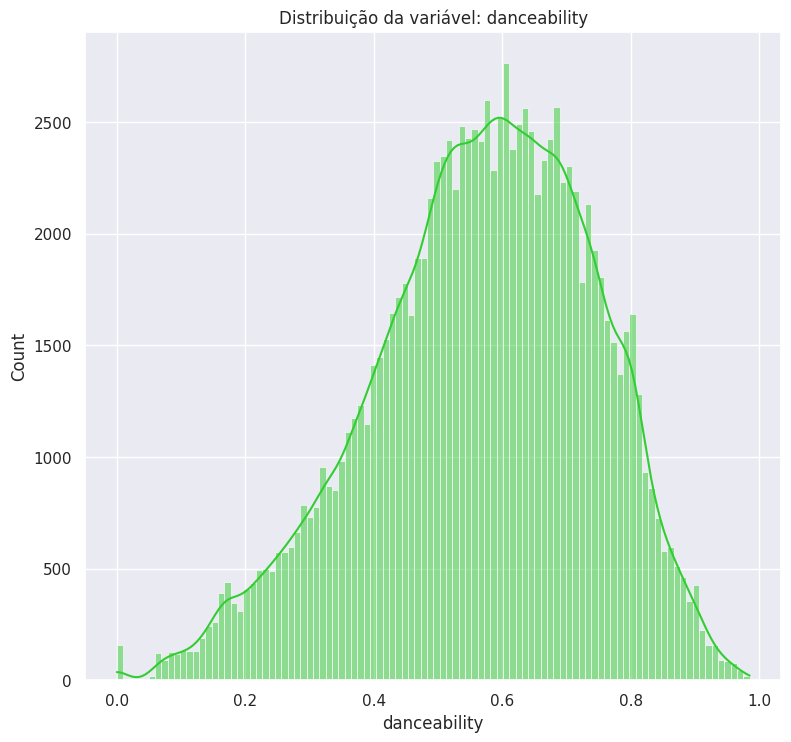

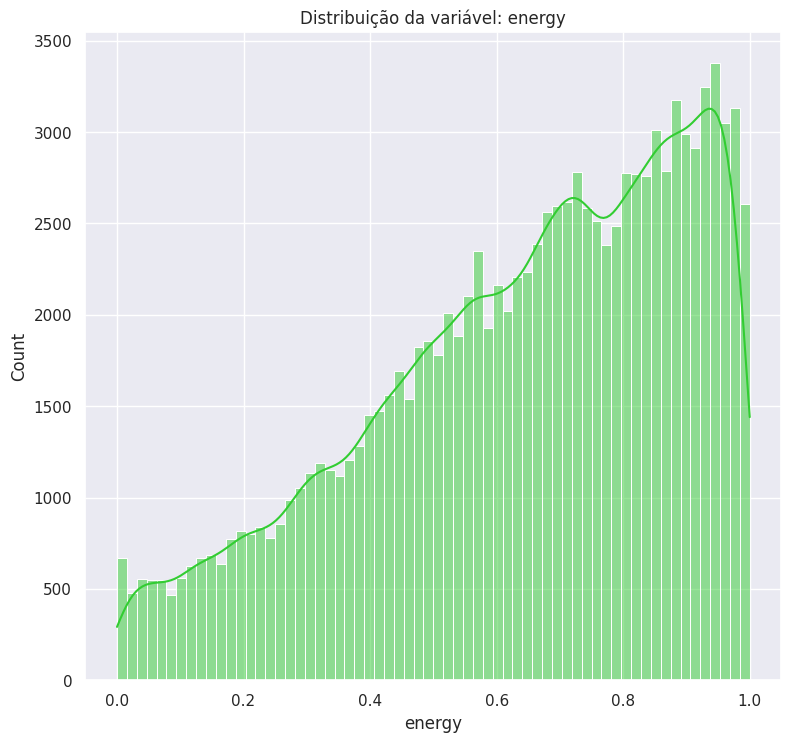

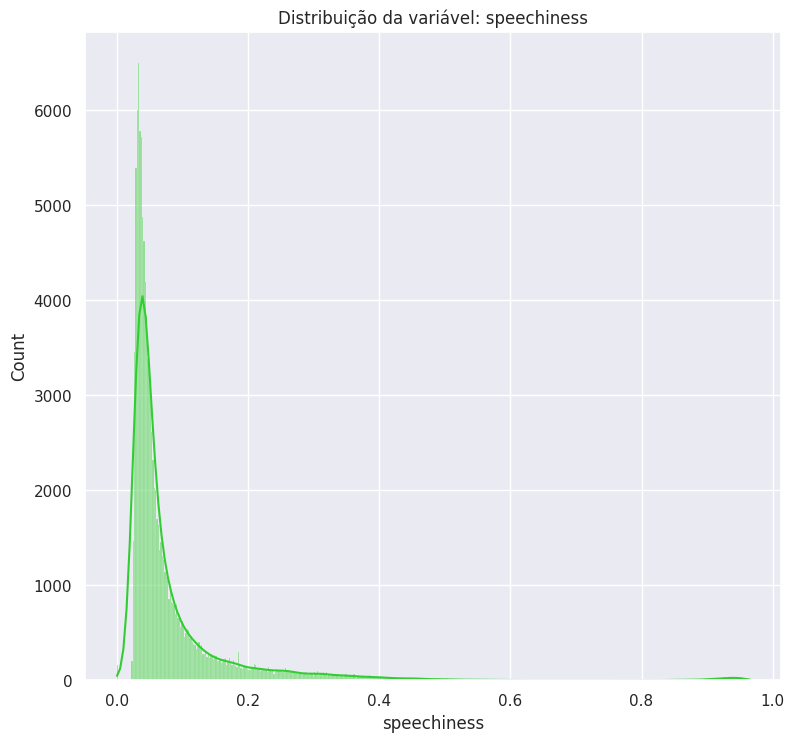

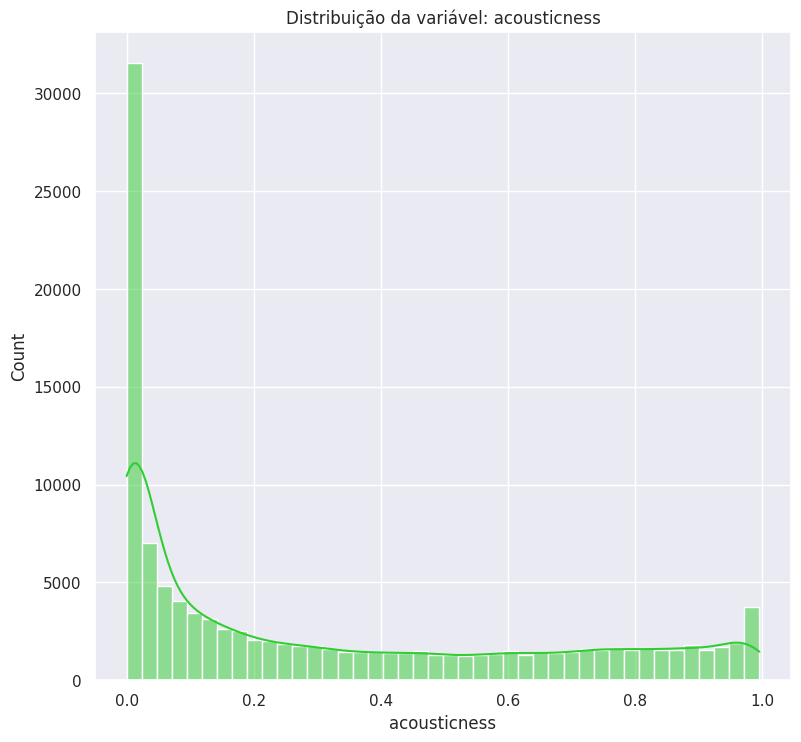

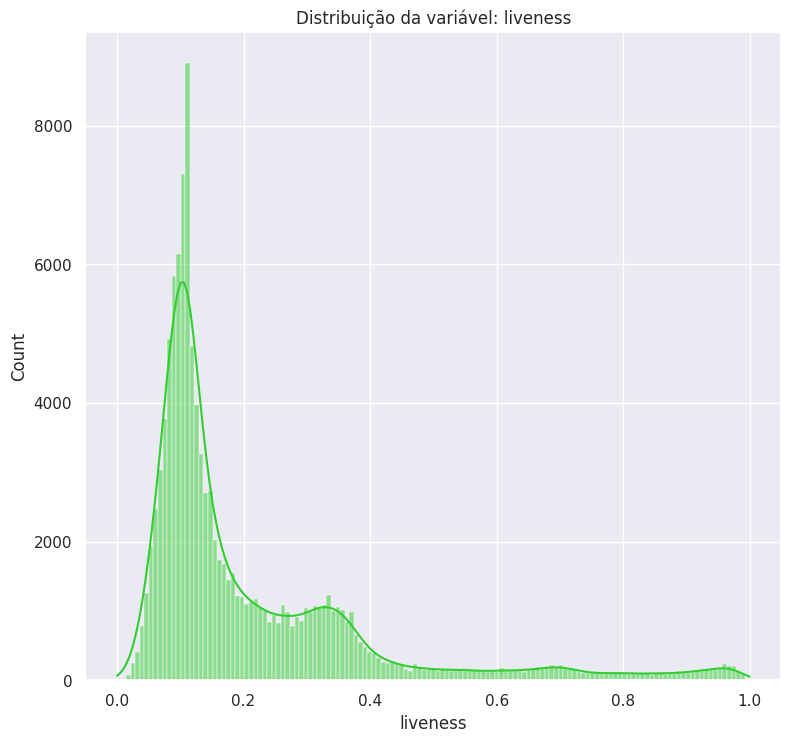

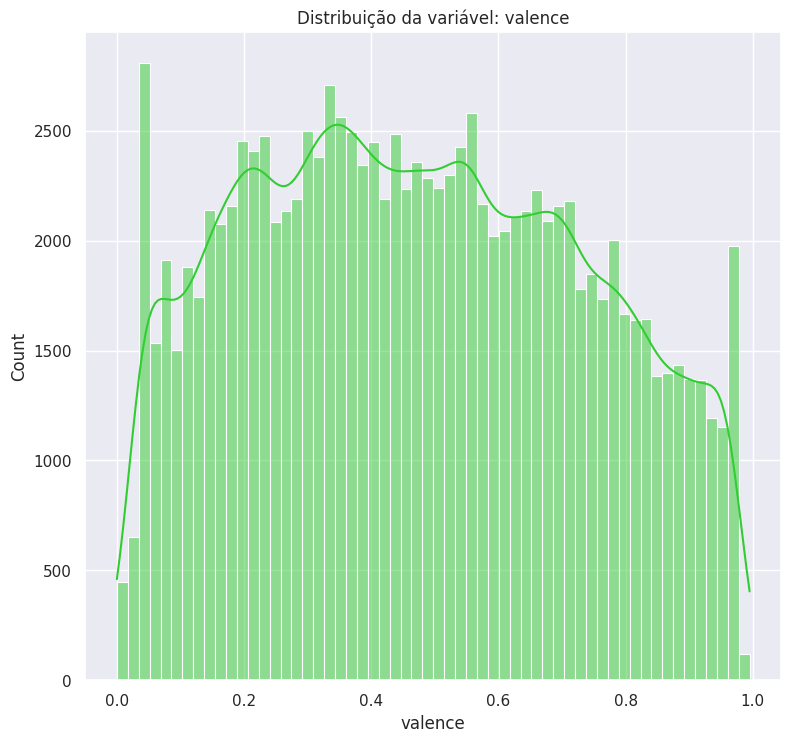

In [ ]:
distinct_songs.head(5)
plt.figure(figsize=(15,8))
features= ['duration_ms',	'danceability',	'energy',	'speechiness', 'acousticness', 'liveness',	'valence']
for feature in features:
    plt.figure(figsize=(8,8))
    sns.histplot(data = df,
                x = feature,
                 color='limegreen',
                kde = True).set_title(f"Distribuição da variável: {feature}")
    plt.show()

###Gráficamente não observamos correlação direta das características com a popularidade

<Figure size 1500x800 with 0 Axes>

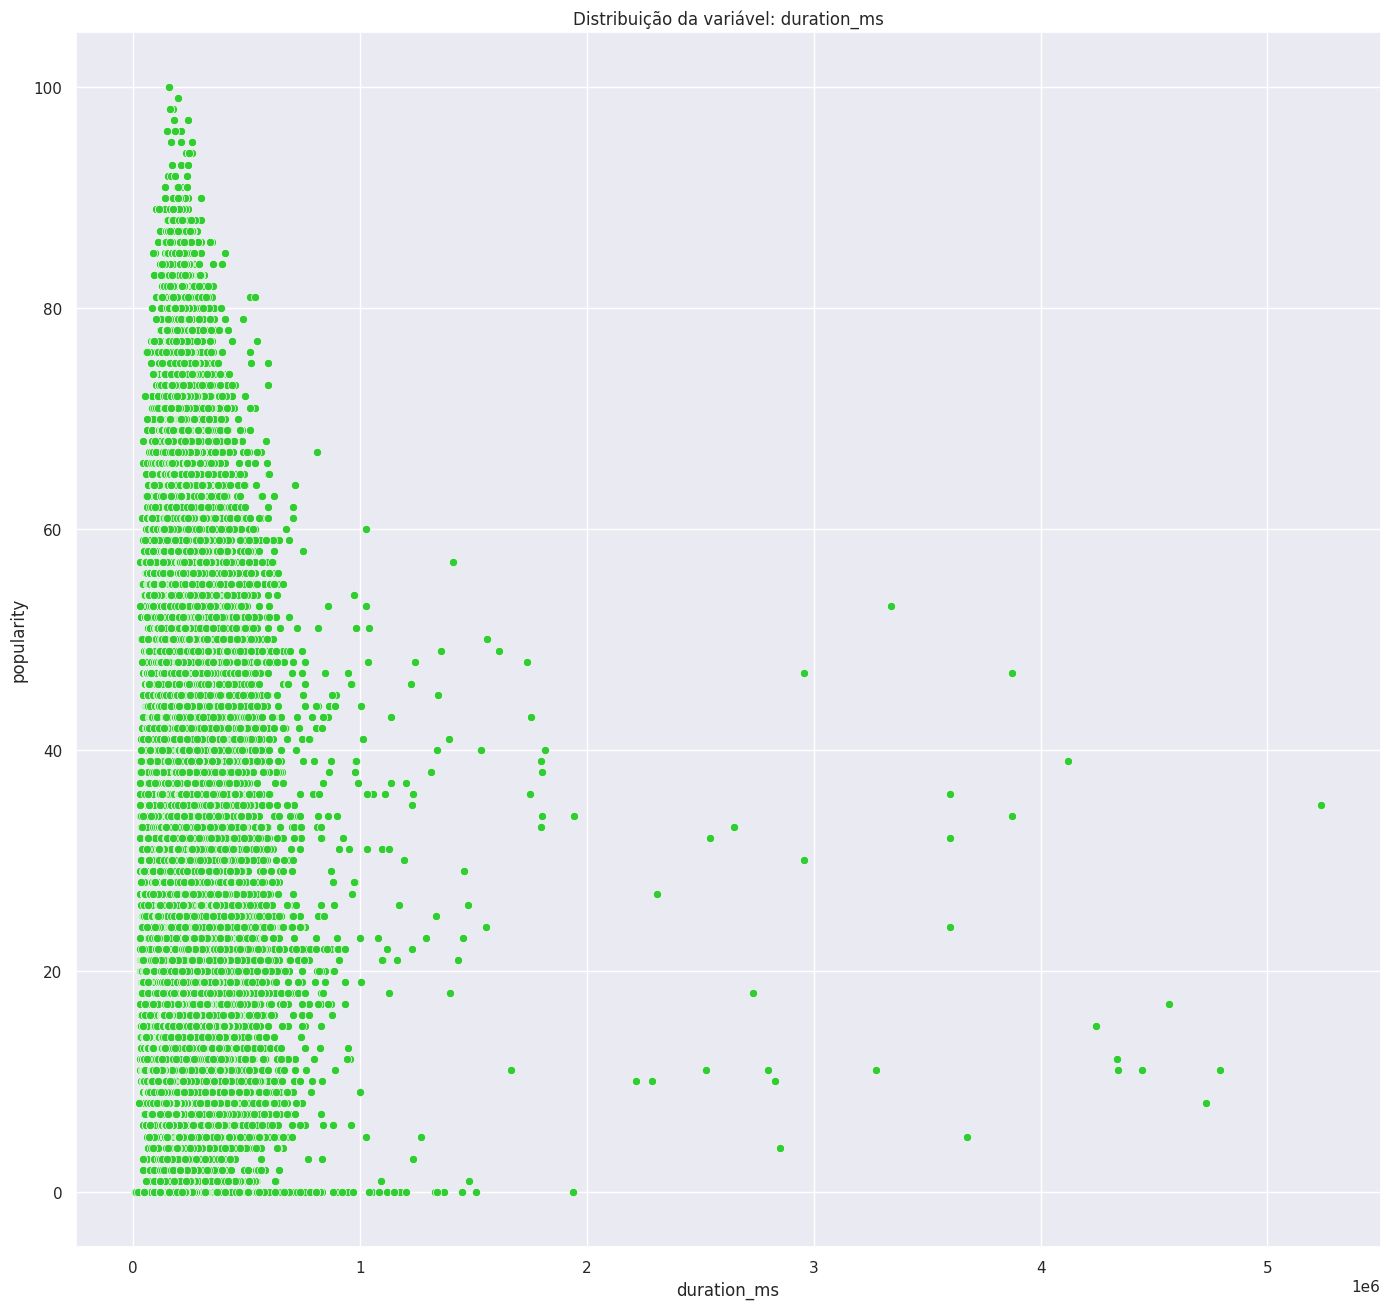

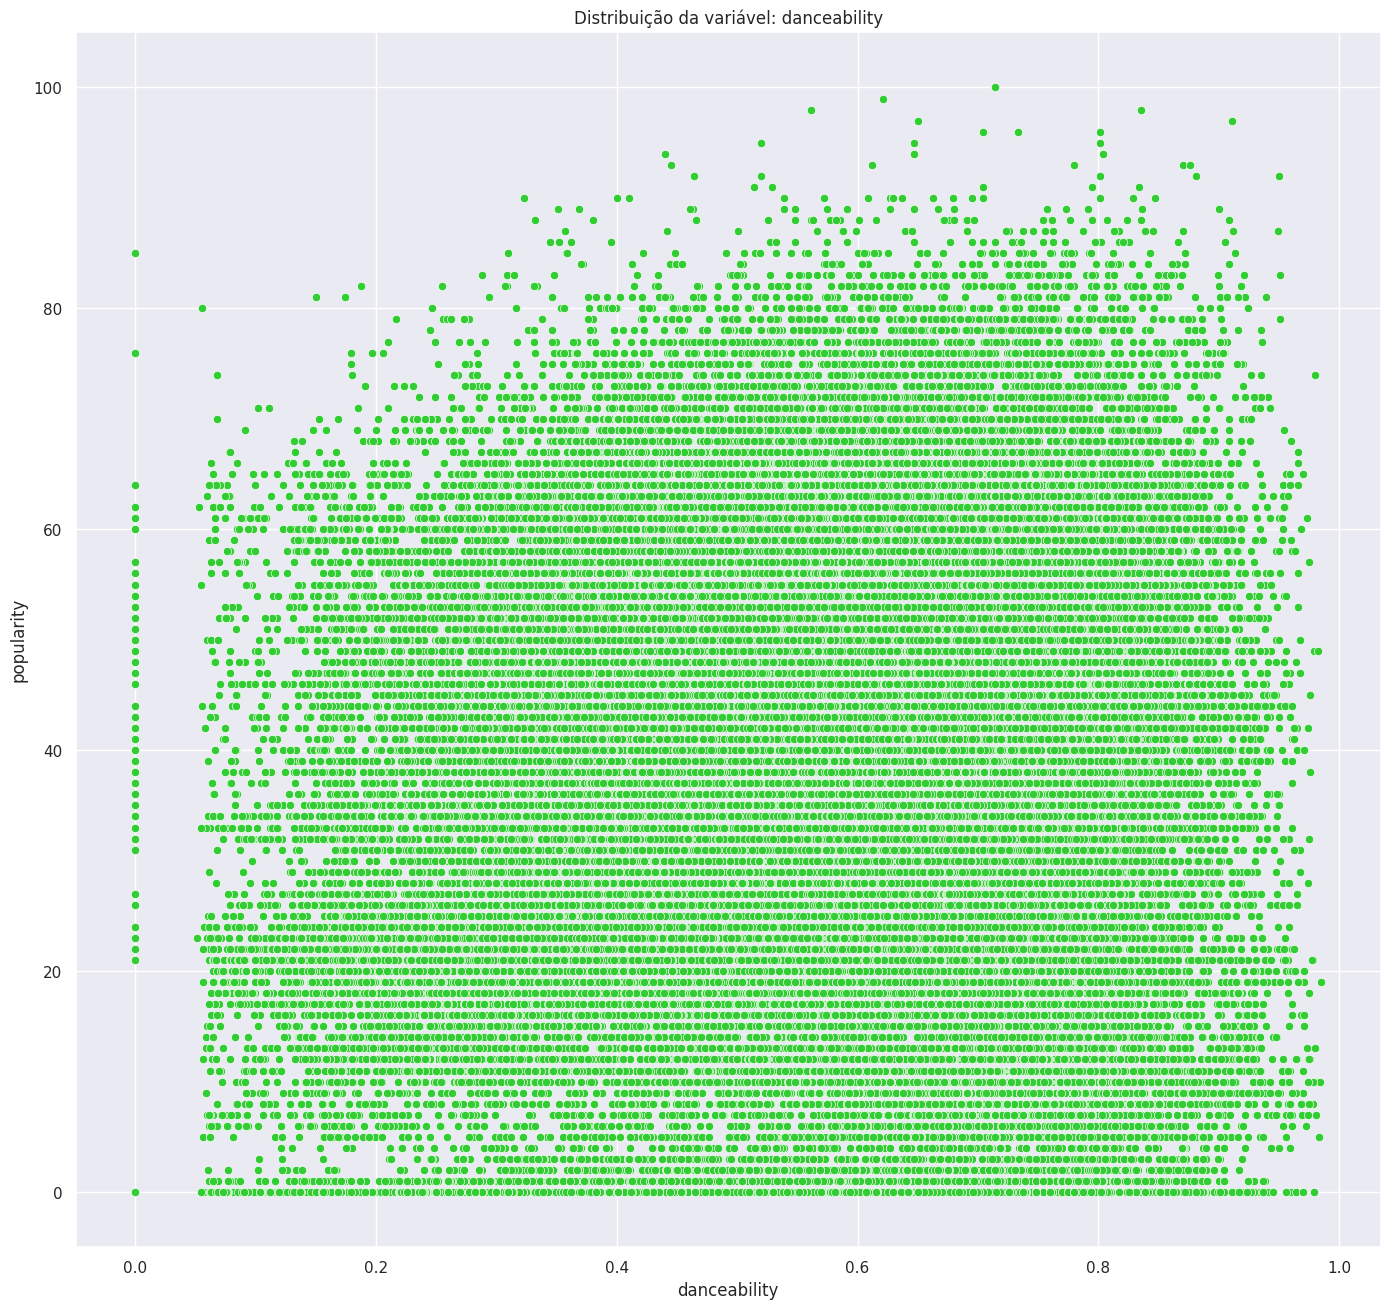

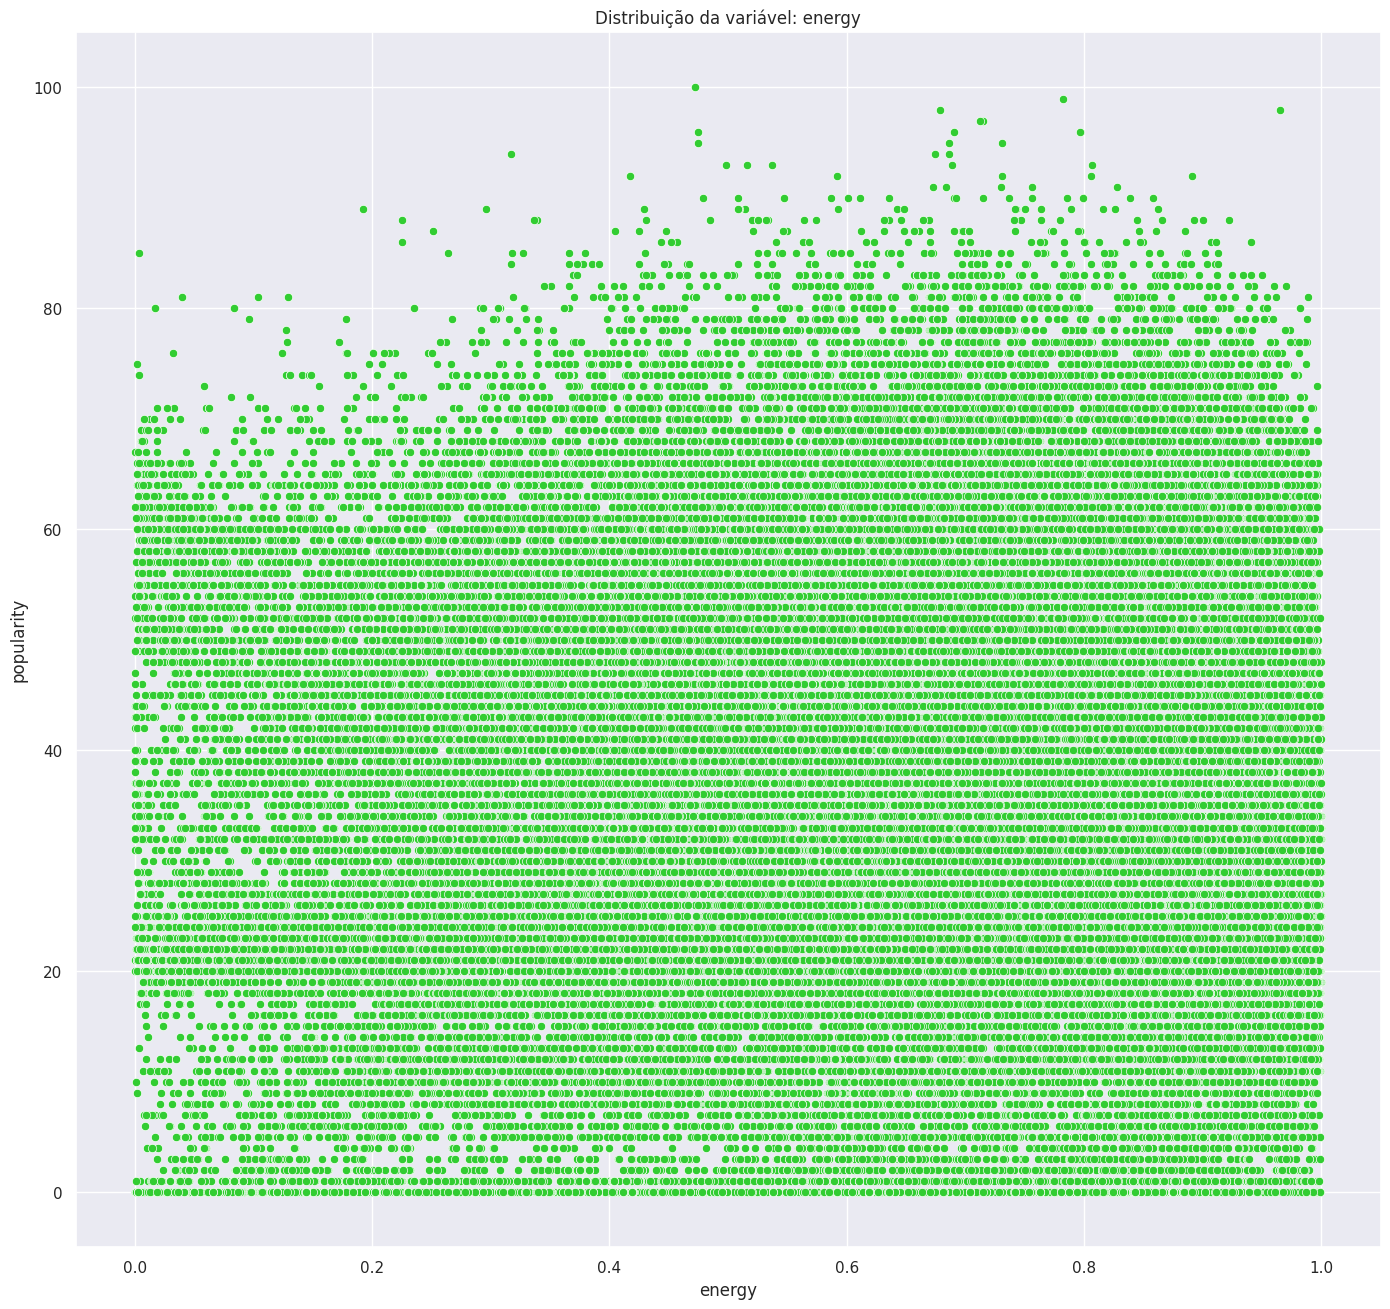

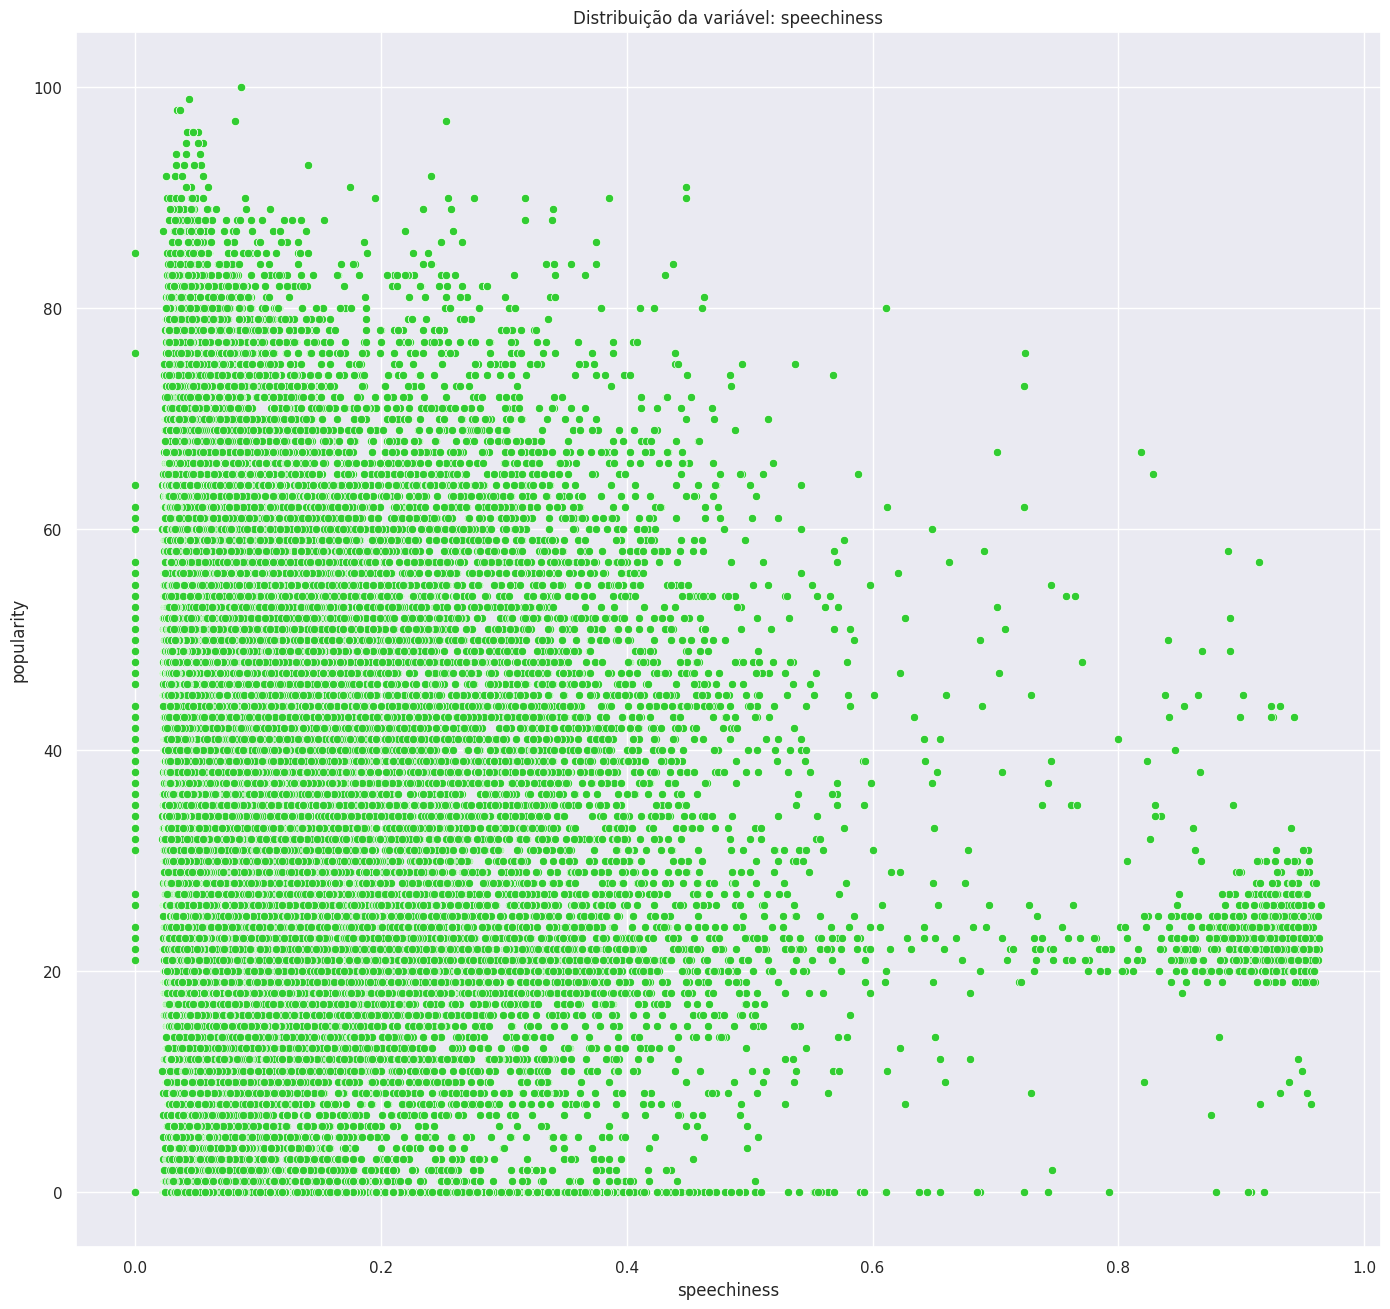

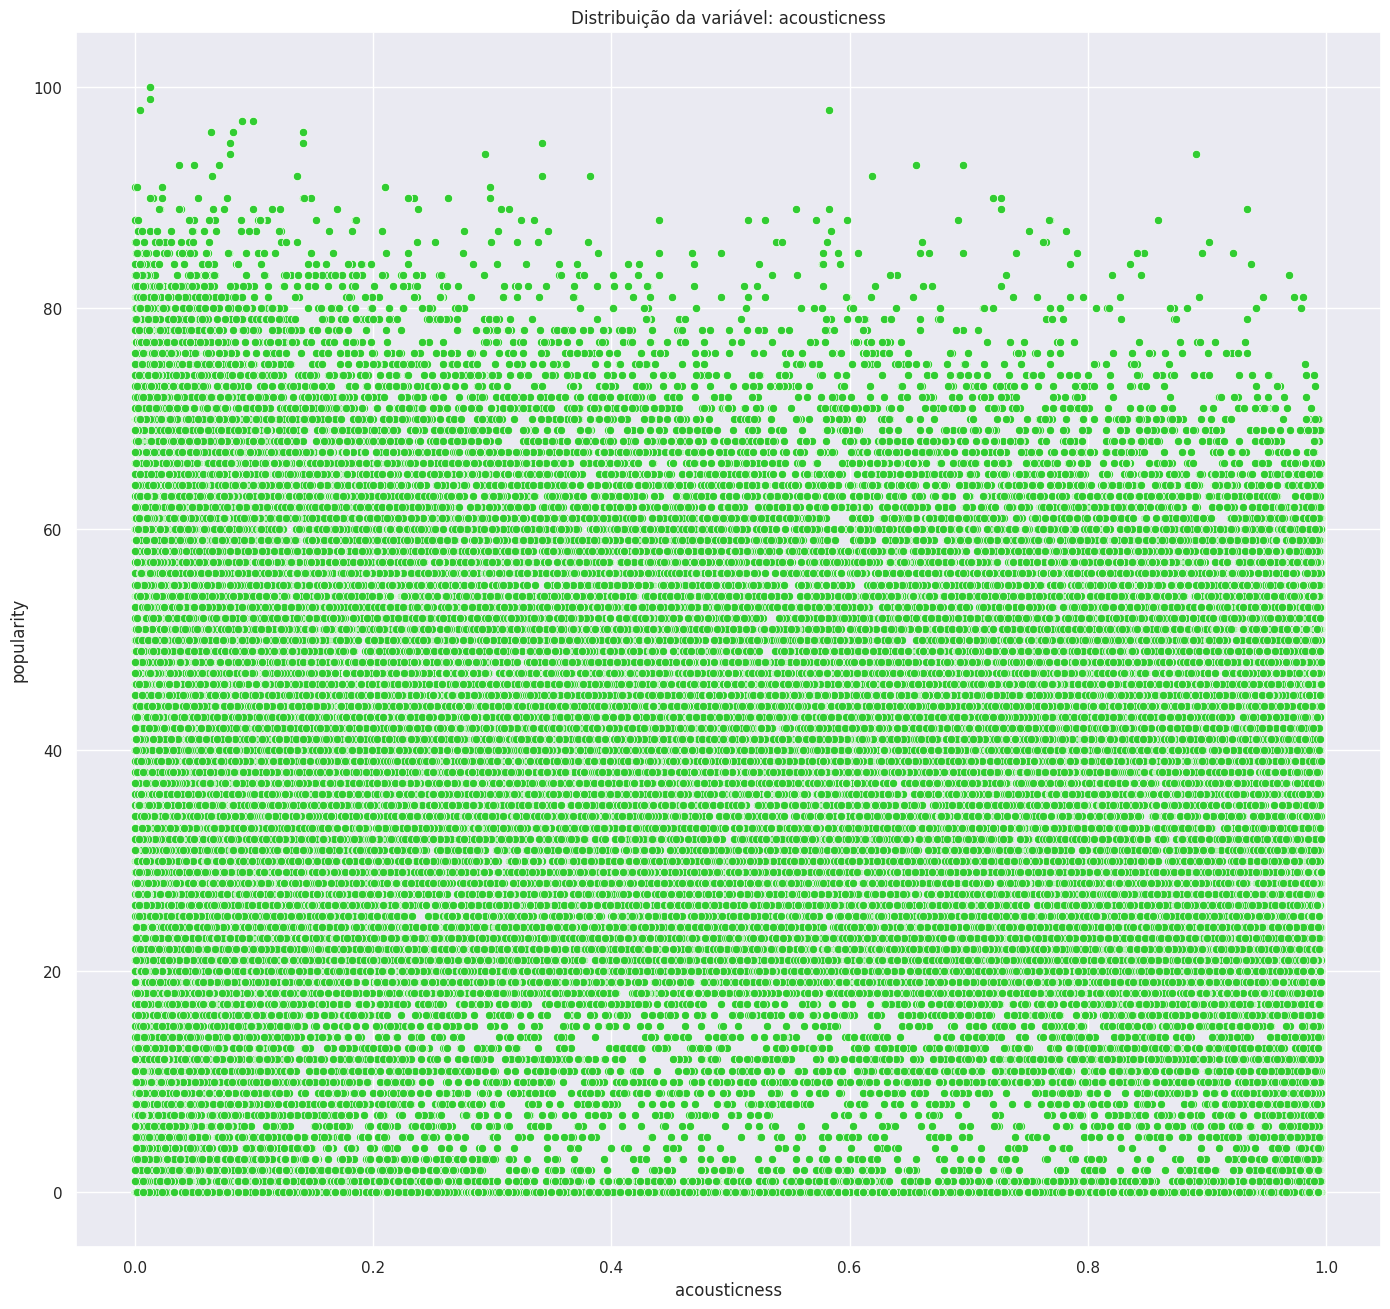

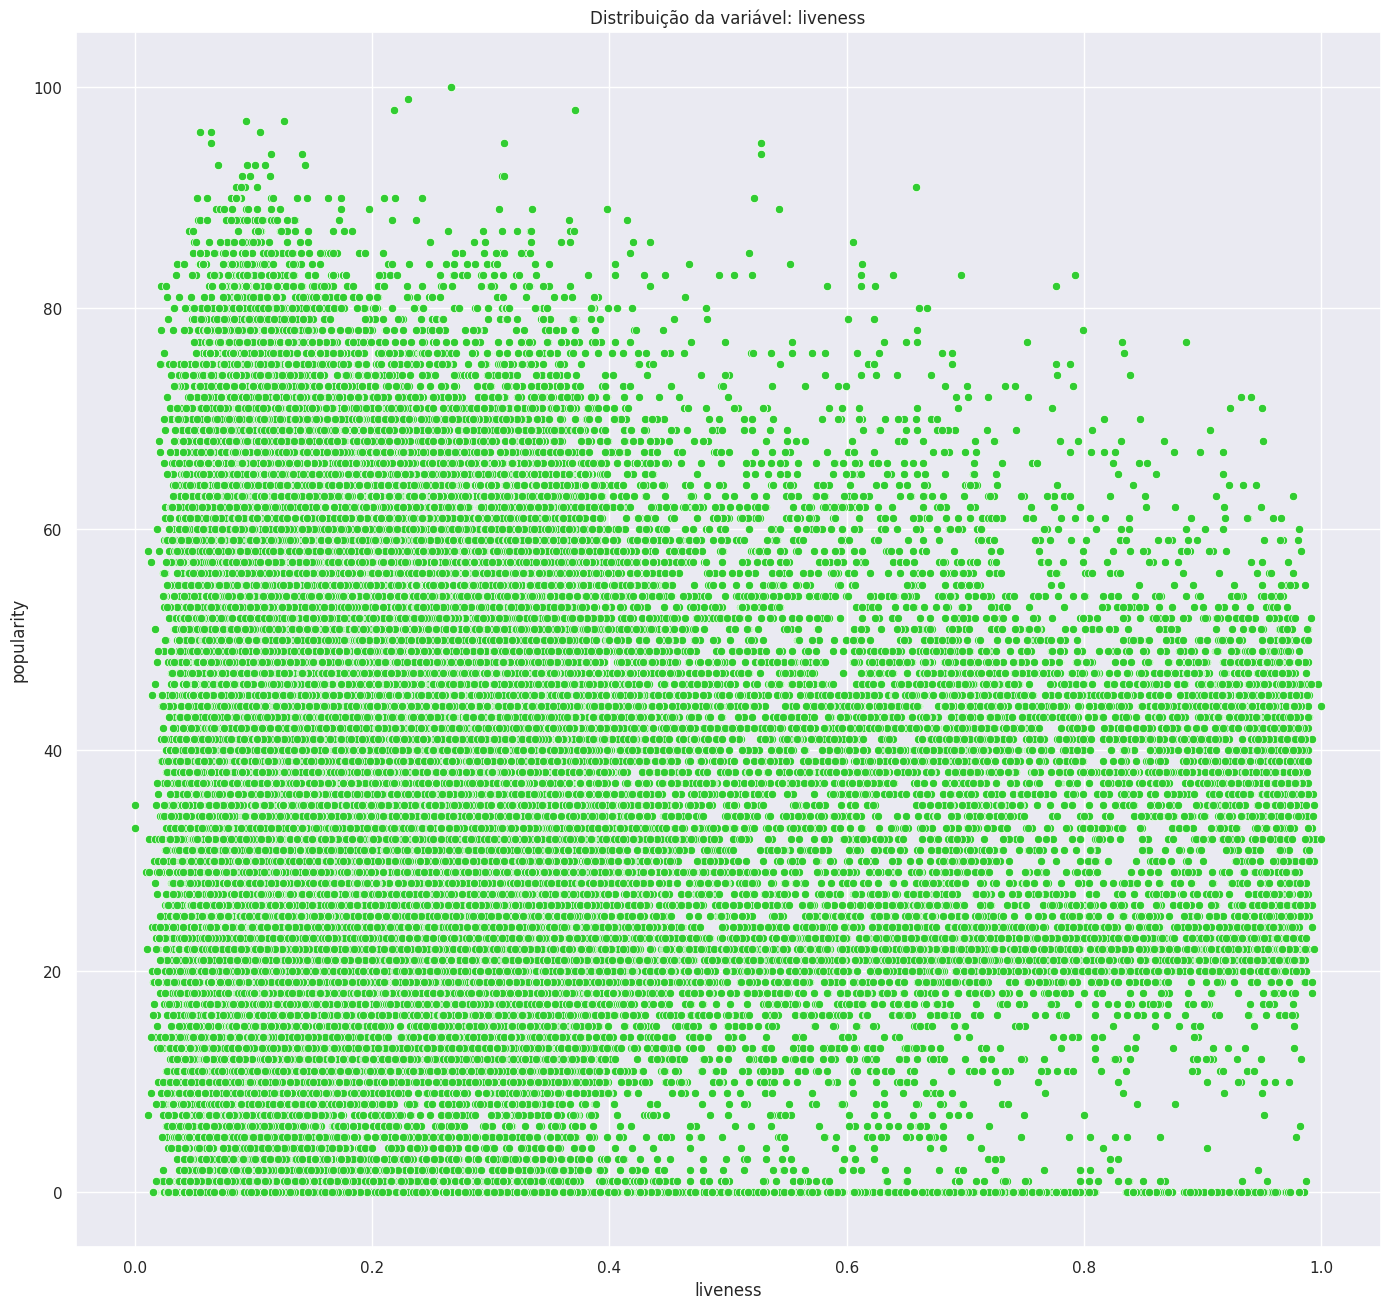

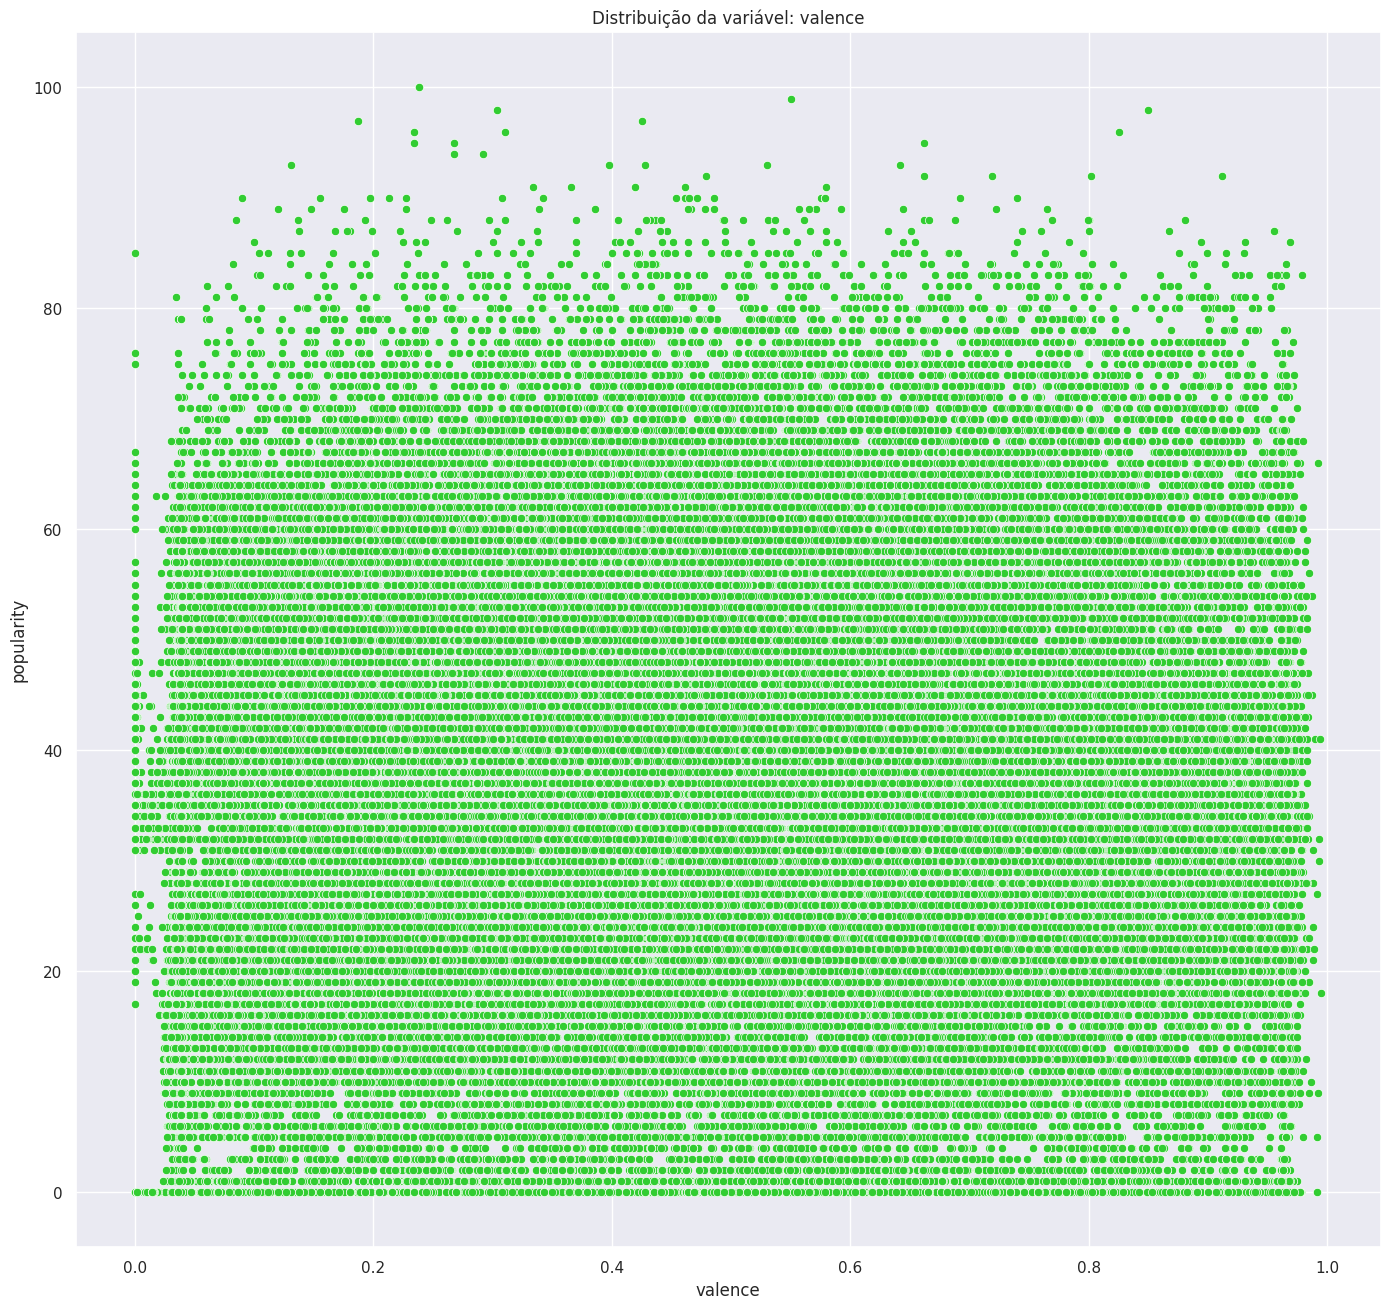

In [ ]:
distinct_songs.head(5)
plt.figure(figsize=(15,8))
features= ['duration_ms',	'danceability',	'energy',	'speechiness', 'acousticness', 'liveness',	'valence']
for feature in features:
    plt.figure(figsize=(15,15))
    sns.scatterplot(data = df,
                x = feature,
                y = 'popularity',
                color='limegreen',
                ).set_title(f"Distribuição da variável: {feature}")
    plt.show()

<ipython-input-134-ccdd03bdf719>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(distinct_songs.corr(), annot=True, cmap = "Greens").set(title='Gráfico de correlação entre as variáveis')


[Text(0.5, 1.0, 'Gráfico de correlação entre as variáveis')]

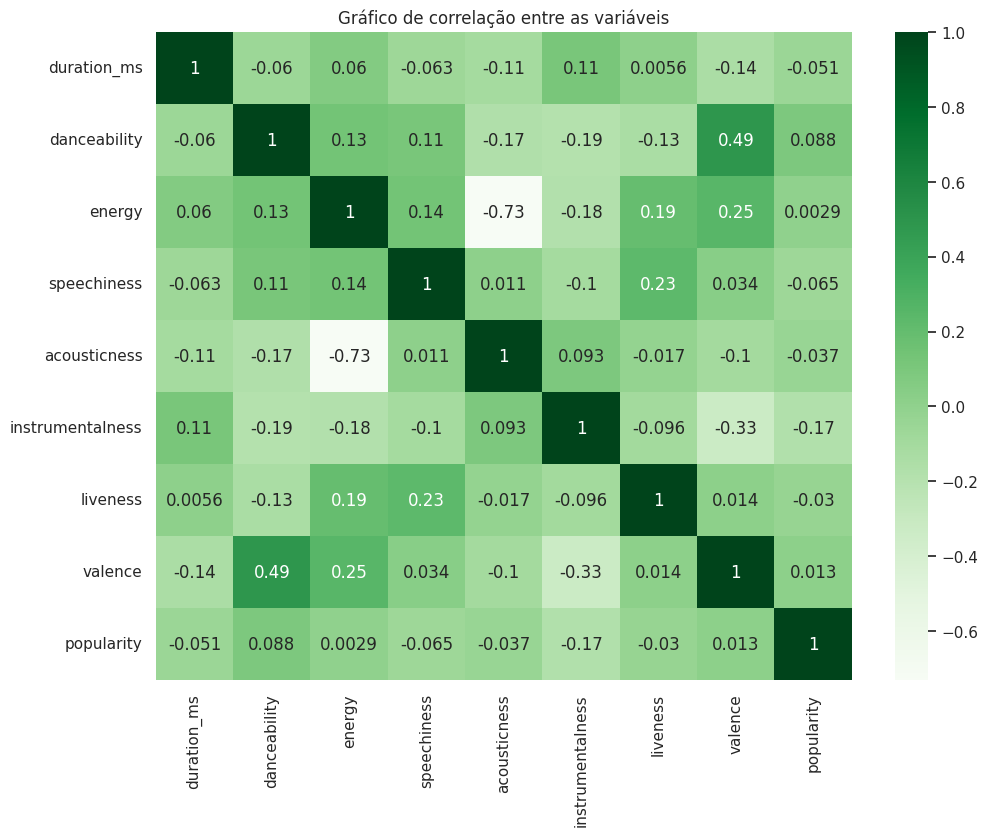

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(distinct_songs.corr(), annot=True, cmap = "Greens").set(title='Gráfico de correlação entre as variáveis')

Musicas mais dancáveis são mais populares?

<Figure size 1500x1500 with 0 Axes>

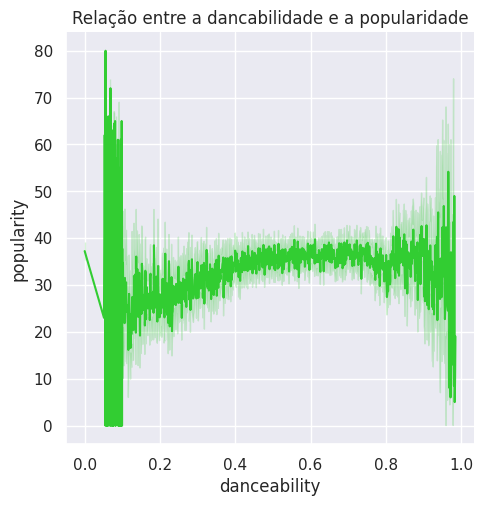

In [ ]:
plt.figure(figsize=(15,15))
plot = sns.relplot(
    data=distinct_songs, kind="line",
    x = 'danceability', y = 'popularity', color='limegreen'
).set(title='Relação entre a dancabilidade e a popularidade')